In [6]:
# Importing 
#general
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#-----
#finance
from pandas_datareader import data as pdr
import yfinance as yf
from datetime import datetime, timedelta
yf.pdr_override()
plt.rcParams["figure.figsize"] = [10,10]  # Set default figure size
import requests

#external modules
# useful to import external libraries
import sys
sys.path.append('..') #now I'm in the parent directory
from src.yahoo.extract import *
from src.yahoo.utils import *
from src.funcs import *
from src.random_matrix import *
from src.export import *

#----
#Plot
#default - clear for Latex
import seaborn as sns
sns.set_style('ticks')
%matplotlib inline
plt.rcParams['figure.figsize'] = [12,12]

#alternative1
plt.style.use('dark_background')

#alternative2
#from jupyterthemes import jtplot 
#jtplot.style('gruvboxl')

In [54]:
tkrs = ['AAPL', 'ABBV', 'ABT', 'ADBE', 'ADI', 'ADP', 'ADSK', 'AIG', 'AMAT', 'AMD',
    'AMGN', 'AMT', 'AMZN', 'AON', 'APA', 'APD', 'ATVI', 'AVGO', 'AXP', 'BA',
    'BAC', 'BAX', 'BBY', 'BDX', 'BK', 'BKNG', 'BLK', 'BMY', 'C',
    'CHTR', 'CI', 'CL', 'CLX', 'CMA', 'CMCSA', 'CME', 'CMI', 'CMS', 
    'COF', 'COP', 'COST', 'CSCO', 'CVS', 'CVX', 'DD', 'DE', 'DHR', 'DIS', 'DOW',
    'DTE', 'DUK', 'DVA', 'EA', 'EBAY', 'ECL', 'ED', 'EMN', 'EMR', 'EOG', 'EQR',
    'ES', 'ETN', 'EXC', 'EXPD', 'F', 'FDX', 'FE', 'FIS', 'FISV', 
    'FLR', 'FMC', 'FOX', 'FOXA', 'GD', 'GE', 'GILD', 'GIS', 'GLW', 'GM', 'GOOG',
    'GPC', 'GPN', 'GS', 'GWW', 'HAL', 'HAS', 'HD', 'HES', 'HIG', 'HON',
    'HPQ', 'HUM', 'IBM', 'ICE', 'IDXX', 'IFF', 'ILMN', 'INCY', 'INTC', 'INTU',
    'IP', 'IPG', 'IQV', 'ISRG', 'IT', 'ITW', 'IVZ', 'JCI', 'JNJ', 'JPM', 'K',
    'KEY', 'KEYS', 'KHC', 'KMI', 'KO', 'KR', 'LEG', 'LH', 'LIN', 'LLY',
    'LMT', 'LOW', 'LRCX', 'LUV', 'LYB', 'MA', 'MAR', 'MAS', 'MCD', 'MCHP',
    'MCK', 'MCO', 'MDLZ', 'MDT', 'MET', 'MMM', 'MO', 'MOS', 'MRK', 'MS', 'MSFT',
    'MU', 'NEM', 'NFLX', 'NI', 'NKE', 'NOC', 'NOV', 'NOW', 'NSC',
    'NTRS', 'NUE', 'NVDA', 'NWL', 'NWS', 'NWSA', 'OKE', 'OMC', 'ORCL', 'OXY',
    'PAYX', 'PCAR', 'PEP', 'PFE', 'PFG', 'PG', 'PGR', 'PH', 'PHM',
    'PKG', 'PKI', 'PLD', 'PM', 'PNC', 'PNR', 'PNW', 'PPG', 'PPL', 'PRGO', 'PRU',
    'PSA']


# Interval of time
start='2005-01-01'
end='2022-12-23'

#df_day = import_data(tkrs, start, end, interval = "1d")
#df_week = import_data(tkrs, start, end, interval = "1wk")
#df_month = import_data(tkrs, start, end, interval = "1mo")
#df_quart = import_data(tkrs, start, end, interval = "3mo")

## Only listed data
#------
#df_day = listed_data(df_day, tkrs, interval = 'day')
#df_week = listed_data(df_week, tkrs, interval = 'week')
#df_month = listed_data(df_week, tkrs, interval = 'month')
#df_quart = listed_data(df_week, tkrs, interval = 'quart')

## What's the industry of each stock
#------
tickers = extract_tickers(df_day)
tkrs_industry = ind_ticks_to_sect(tickers)
idx_by_sector, sector_dict, sector_indices, sector_labels = sectors(tkrs_industry)


# returns
returns_d = clean_data(df_day, prd=1)

In [56]:
path_clean = '/Users/pietrobicocchi/Desktop/project/data/cleaned/cleaned_data.pkl'
returns_clean_d = load_cleaned_data(path_clean)
returns_d = returns_clean_d

## What's the industry of each stock
#------
tickers = extract_tickers(returns_d)
tkrs_industry = ind_ticks_to_sect(tickers)
idx_by_sector, sector_dict, sector_indices, sector_labels = sectors(tkrs_industry)

In [13]:
# correlations
corr_d = returns_d.corr(method = 'pearson')
eVal_d , eVec_d = getPCA( corr_d ) 
corr_d

,AAPL,ABBV,ABT,ADBE,ADI,ADP,ADSK,AIG,AMAT,AMD,...,PLD,PM,PNC,PNR,PNW,PPG,PPL,PRGO,PRU,PSA
AAPL,1.000000,0.285624,0.347640,0.490138,0.490132,0.447961,0.453442,0.284185,0.497126,0.389710,...,0.394294,0.374873,0.358368,0.429499,0.282813,0.431178,0.306449,0.263379,0.391746,0.364649
ABBV,0.285624,1.000000,0.452654,0.324943,0.329951,0.385783,0.314371,0.334013,0.321247,0.193548,...,0.330406,0.307166,0.346023,0.319442,0.269604,0.351858,0.273174,0.268740,0.358356,0.259844
ABT,0.347640,0.452654,1.000000,0.414098,0.407409,0.499297,0.397498,0.255780,0.383905,0.297049,...,0.363830,0.401774,0.351748,0.403080,0.388894,0.434808,0.385170,0.313844,0.400716,0.353517
ADBE,0.490138,0.324943,0.414098,1.000000,0.539315,0.544928,0.601539,0.292808,0.531357,0.418549,...,0.472881,0.339276,0.387965,0.470935,0.343539,0.479059,0.330131,0.272176,0.436947,0.424763
ADI,0.490132,0.329951,0.407409,0.539315,1.000000,0.535610,0.536361,0.309443,0.701051,0.492306,...,0.434677,0.388796,0.422508,0.512465,0.345558,0.538673,0.343080,0.291412,0.457645,0.381889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PPG,0.431178,0.351858,0.434808,0.479059,0.538673,0.581691,0.504584,0.386814,0.532715,0.364142,...,0.552009,0.452192,0.546799,0.627925,0.451042,1.000000,0.452110,0.324465,0.576715,0.497188
PPL,0.306449,0.273174,0.385170,0.330131,0.343080,0.473590,0.303116,0.316266,0.336130,0.216485,...,0.438637,0.468570,0.356237,0.420659,0.697996,0.452110,1.000000,0.272973,0.400987,0.429872
PRGO,0.263379,0.268740,0.313844,0.272176,0.291412,0.317421,0.292632,0.207336,0.277285,0.204679,...,0.260759,0.283584,0.270262,0.325912,0.267215,0.324465,0.272973,1.000000,0.325522,0.250478
PRU,0.391746,0.358356,0.400716,0.436947,0.457645,0.524260,0.426938,0.490838,0.467447,0.332760,...,0.586637,0.416989,0.699047,0.541653,0.399478,0.576715,0.400987,0.325522,1.000000,0.536659


/var/folders/x6/85hsl6vd4xn8qtg06p6gf4j80000gn/T/ipykernel_36698/2715358044.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


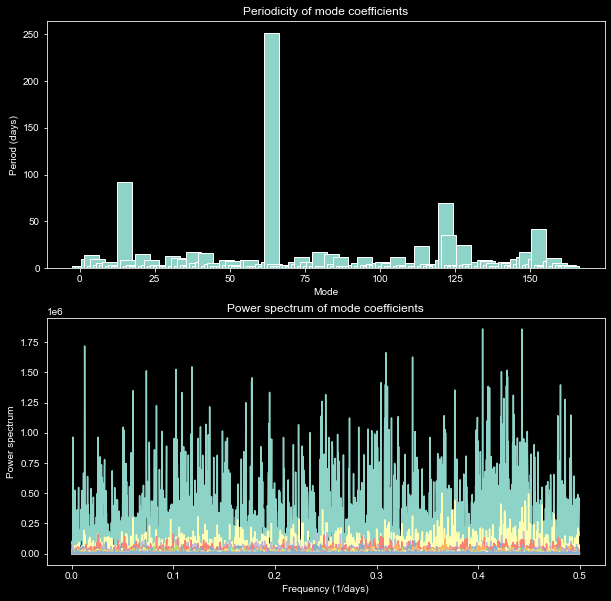

In [16]:
periods, power_spectra = analyze_mode_coefficients(returns_d)
fig = plot_mode_analysis(periods, power_spectra, returns_d)
fig.show()

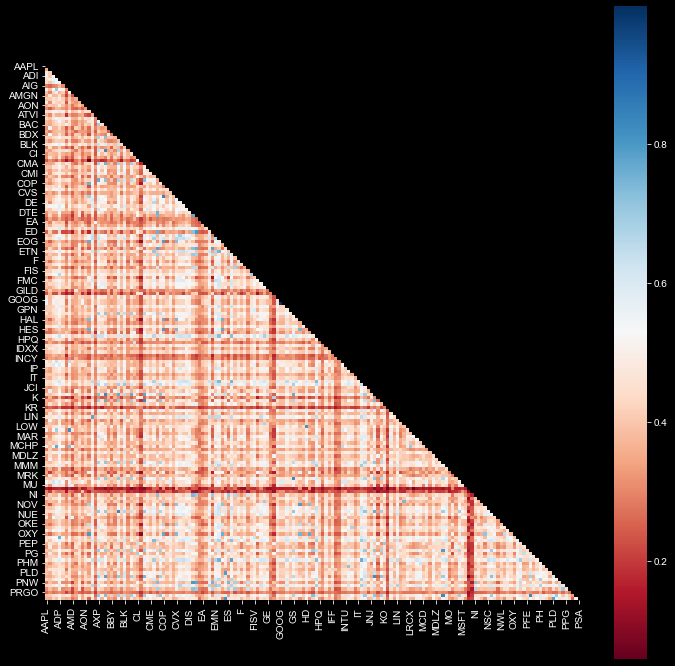

In [237]:
# Create a mask to hide some cells
mask = np.zeros_like(corr_d)
mask[np.triu_indices_from(mask)] = True
colormap = plt.cm.RdBu

# Create the heatmap with the mask
sns.heatmap(corr_d, mask=mask, cmap=colormap, square=True, annot=False)

# Show the plot
plt.show()

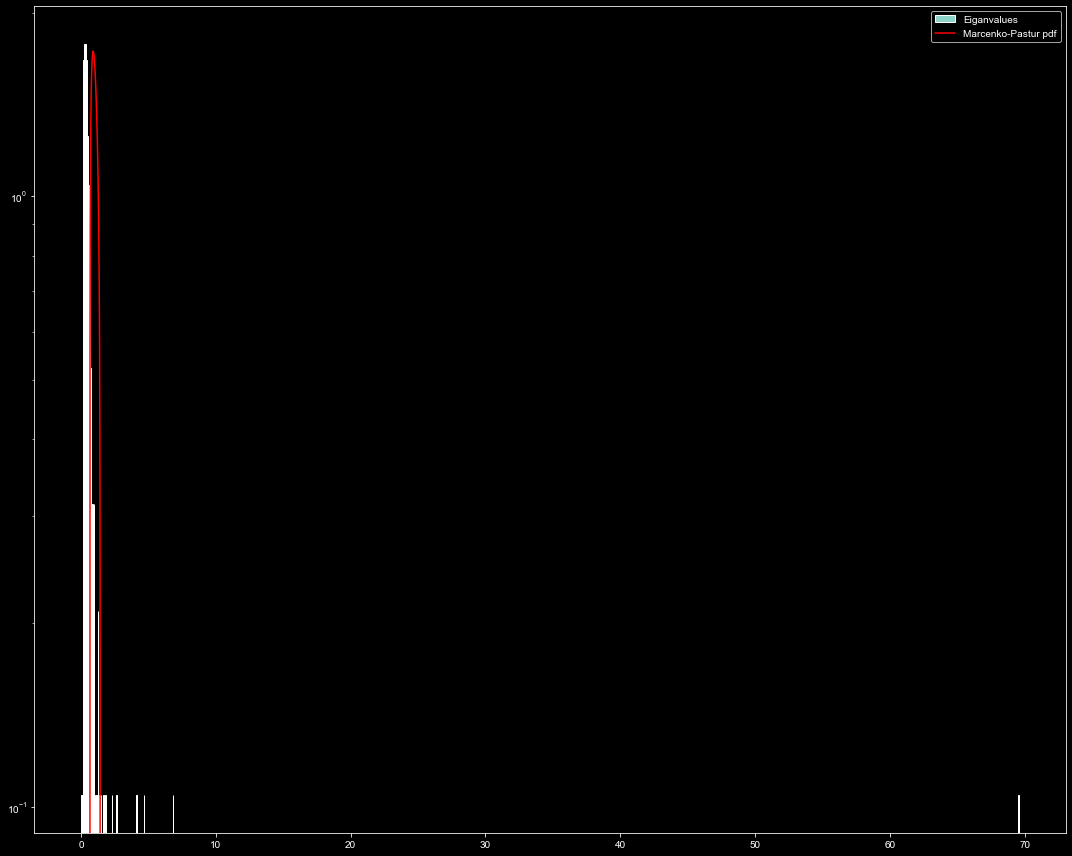

In [107]:
N = len(corr_d)
T = len(returns_d)

#get eigendecomposition
Q = T/N
eVal , eVec = getPCA(corr_d) 
#pdf1 = fitKDE(np.diag(eVal), bWidth=.005) #empirical pdf
pdf0 = mpPDF(1., Q, pts=N)


# KDE and Marcenko-Pastur, and histogram
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.hist(np.diag(eVal), density = True, bins=1200, label="Eiganvalues") # Histogram the eigenvalues
plt.plot(pdf0.keys(), pdf0, color='r', label="Marcenko-Pastur pdf")
#plt.plot(pdf1.keys(), pdf1, color='g', label="Empirical:KDE")


#plotting
plt.yscale('log') ## lOG SCALE
#plt.xscale('log')
plt.legend(loc="upper right")
plt.show()

### daily

studying the modes

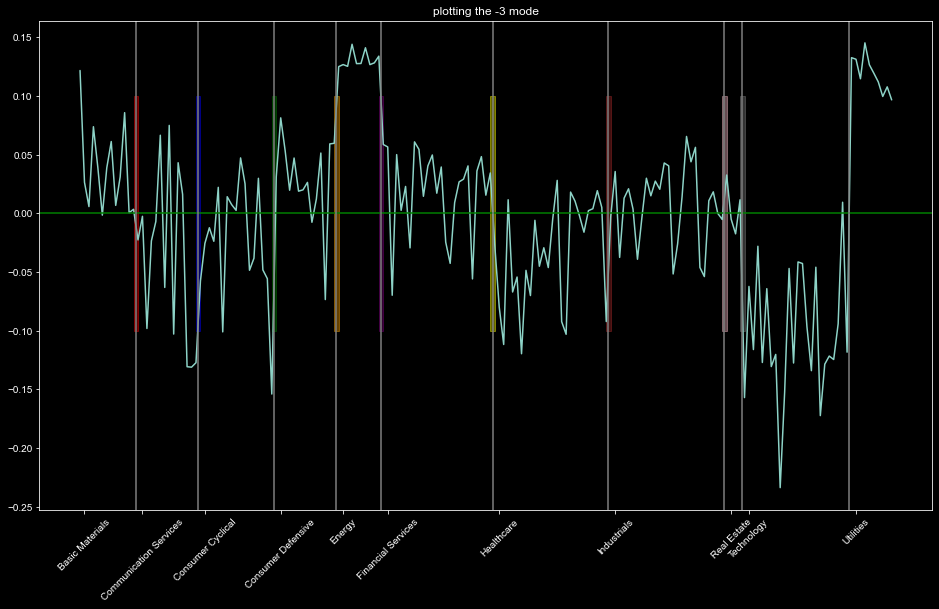

In [36]:
N = len(corr_d)
T = len(returns_d)

#visualize_pm_eig(N, T, corr_d)

#fig = visualize_mode(eVec_d, corr_d, mode=-1)
#fig.show()

plot_by_sector(mode=-3, tk_ind = tkrs_industry, eVec = eVec_d)

Which companies corresponds to the two peaks in the last mode?

In [61]:
def get_indices_of_two_largest(arr):
    """
    get the index of the two larges components in absolute value
    """
    absolute_arr = np.abs(arr)  # Get absolute values of the array
    sorted_indices = np.argsort(absolute_arr)  # Sort indices based on absolute values

    # Get the indices of the two largest absolute values
    largest_indices = sorted_indices[-2:]
    
    
    return largest_indices
indx_larg = get_indices_of_two_largest(eVec_d[:,10])
indx_larg
print(tickers[indx_larg[0]], tickers[indx_larg[1]])

BAC CMA


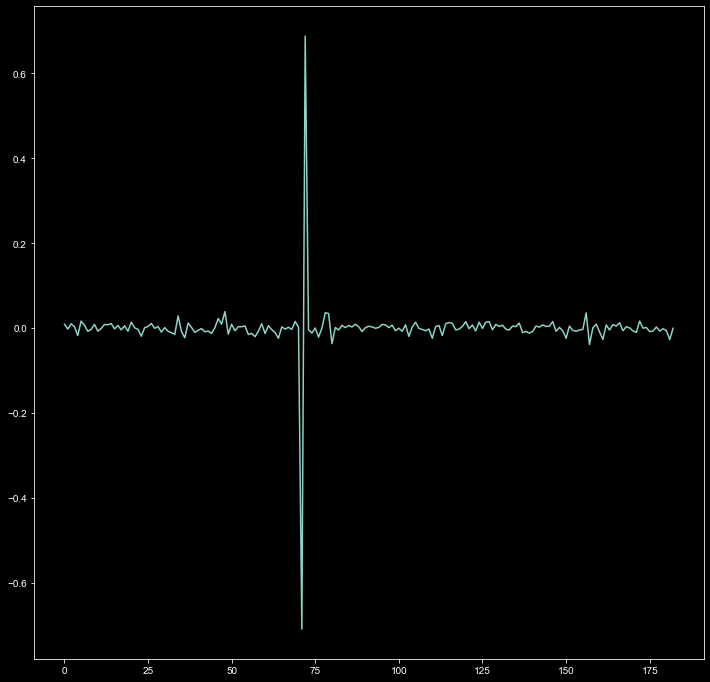

In [57]:
plt.plot(eVec_d[:,3])
#sorted_indices = np.argsort(eVec_d[0])
#sorted_indices

In [235]:
largest_ind = get_indices_of_two_largest(eVec_d[0])
largest_ind

a_1 = list(df_day.keys())[0]
a_2 = list(df_day.keys())[164]
print(a_1, a_2)

a_1 = yf.Ticker(str(a_1))
a_2 = yf.Ticker(str(a_2))
print(yf.Ticker(str(a_1)), a_1.info['sector'])
print(yf.Ticker(str(a_2)), a_2.info['sector'])

AAPL PSA
yfinance.Ticker object <YFINANCE.TICKER OBJECT <AAPL>> Technology
yfinance.Ticker object <YFINANCE.TICKER OBJECT <PSA>> Real Estate


In [227]:
def industries_for_largest_components(eVec, mode = 0):
    i = mode
    a = np.where(abs(eVec[i])>0.18) #indices of largest components
    for el in a[0]: # since a is a tuple
        print(f"ticker: {tickers[el]} corresponds to intensity of eigenvector component of {eVec[i][el]}")
        a = yf.Ticker(tickers[el])
        print(a.info["industry"])
        
industries_for_largest_components(eVec_d, mode = -1)

ticker: AMT corresponds to intensity of eigenvector component of -0.3964667703753692
REIT—Specialty
ticker: AMZN corresponds to intensity of eigenvector component of -0.20384133123232911
Internet Retail
ticker: BAX corresponds to intensity of eigenvector component of -0.34045767511637237
Medical Instruments & Supplies


### weekly

In [43]:
# returns
returns_w = clean_data(df_day, prd=7)

# correlations
corr_w = returns_w.corr(method = 'pearson')
eVal_w, eVec_w = getPCA(corr_w) 

In [44]:
eVec_w[0]
np.diag(eVal_w)[-1]

64.70166899834707

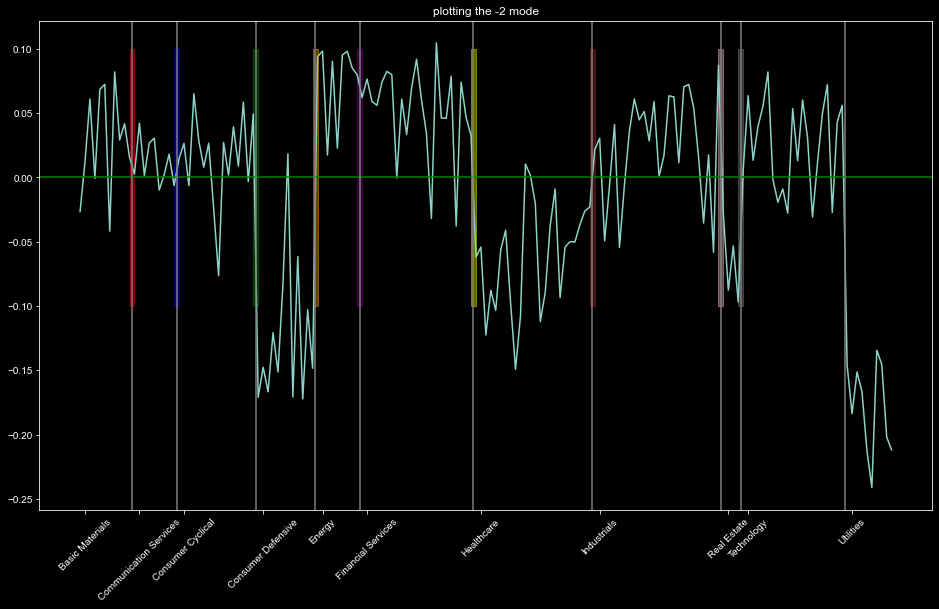

In [45]:
plot_by_sector(mode=-2, tk_ind = tkrs_industry, eVec = eVec_w)

### monthly

In [46]:
# returns
returns_m= clean_data(df_day, prd=30)

# correlations
corr_m = returns_m.corr(method = 'pearson')
eVal_m, eVec_m = getPCA(corr_m) 

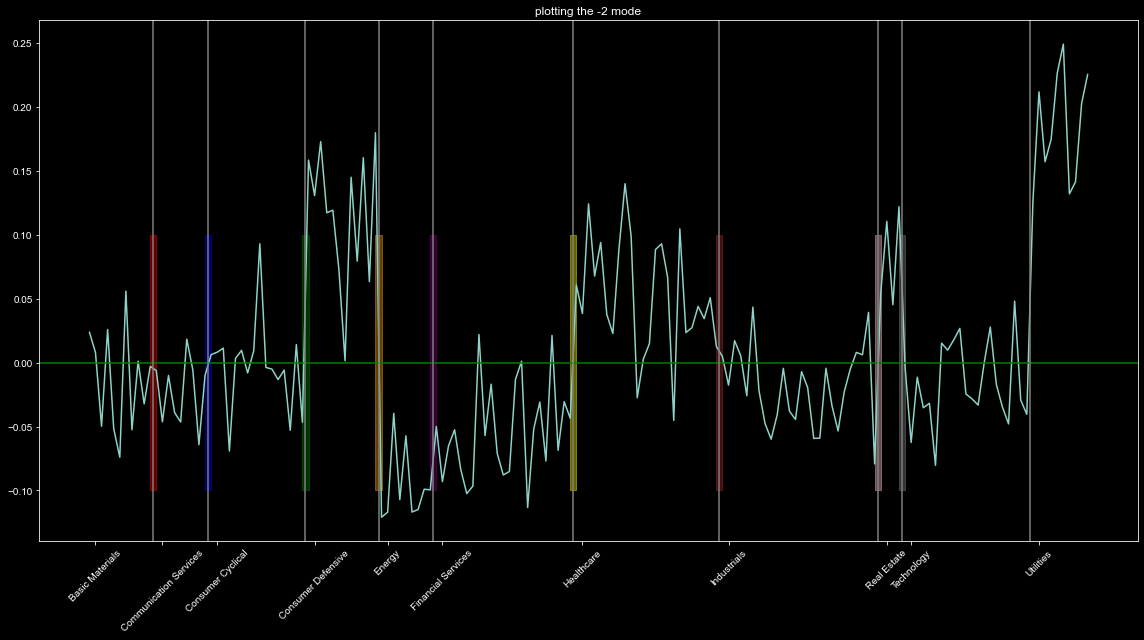

In [255]:
plot_by_sector(mode=-3, tk_ind = tkrs_industry, eVec = eVec_m)

look how the (metric bouchaud) changes varying the frequency in the x-axiss

In [49]:
# first metric
overlap_distance(eigenvectors_1 = eVec_m, eigenvectors_2 = eVec_d)

Overlap distance for the first 10 eigenvectors: 1.3367027507965528


1.3367027507965528

In [267]:
correlation = {}
eigendec = {}
periods = [1,2,4,8,10,20,40,60,90,100,120,150]
for  i in periods:
    returns = clean_data(df_day, prd=i)
    corr = returns.corr(method = 'pearson')
    corr = corr.replace([np.nan, np.inf, -np.inf], 0)
    correlation[f"c_{i}"] = corr
    eigendec[f'eg_dec_{i}'] = getPCA(corr) 

In [268]:
correlation['c_150']
eigendec['eg_dec_150'][1]

array([[ 0.00398133,  0.02795633, -0.0298602 , ...,  0.01199052,
        -0.07211159, -0.03603314],
       [ 0.00948784,  0.00792334, -0.03955592, ..., -0.04071967,
        -0.1095053 , -0.06093904],
       [ 0.00307249,  0.01655609,  0.08106808, ...,  0.02375329,
        -0.1808617 , -0.07152405],
       ...,
       [ 0.00517122,  0.01683549,  0.03798707, ..., -0.02481624,
        -0.00485601, -0.02268509],
       [-0.01355468, -0.43936927, -0.01577153, ...,  0.05940325,
         0.06662442, -0.11205341],
       [-0.00376918, -0.00095551,  0.01766128, ..., -0.12556567,
         0.06937627, -0.04785098]])

In [304]:
# second metric
distance = []

for per in periods:
    V0 = eigendec['eg_dec_1'][1]
    V1 = eigendec[f'eg_dec_{per}'][1]
    dist = spectral_distance_metric(V0, V1, n=10)
    distance.append(dist)

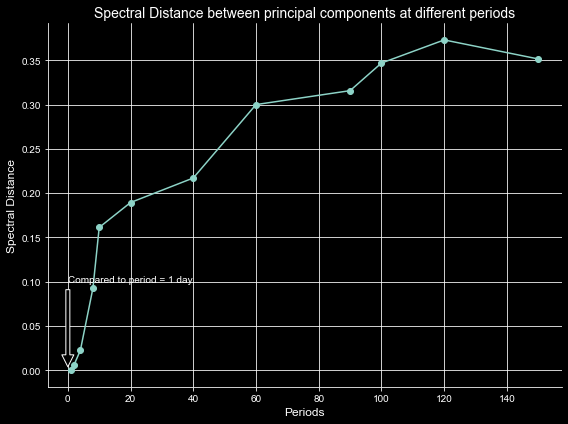

In [305]:
plt.figure(figsize=(8, 6))
plt.plot(periods, distance,linestyle='-', marker='o')
plt.xlabel('Periods', fontsize=12)
plt.ylabel('Spectral Distance', fontsize=12)
plt.title('Spectral Distance between principal components at different periods', fontsize=14)
#plt.style.use('ggplot')
plt.grid(True)

plt.annotate('Compared to period = 1 day', xy=(0,0.), xytext=(0, 0.1),
             arrowprops=dict(facecolor='black', shrink=0.04))

# Remove the top and right spines
sns.despine()

# Save the plot as a PDF file
#plt.savefig('plot.png', dpi=300, bbox_inches='tight')

plt.show()

? Are eigenvectors sparse or dense?

Using the $\sum(v^2)^2$ metric can be effective in assessing the extent of sparsity or localization in eigenvectors. Higher values of the metric indicate a more localized or sparse eigenvector, while lower values suggest a more spread-out or delocalized eigenvector.

In [126]:
# returns
returns_d = clean_data(df_day, prd=1)

# correlations
corr_d = returns_d.corr(method = 'pearson')
eVal_d , eVec_d = getPCA( corr_d ) 

In [186]:
np.sum(eVec_d[-3:]**4, axis = 1) # for each evector it returns the metric

array([0.07210629, 0.13980257, 0.04933165])

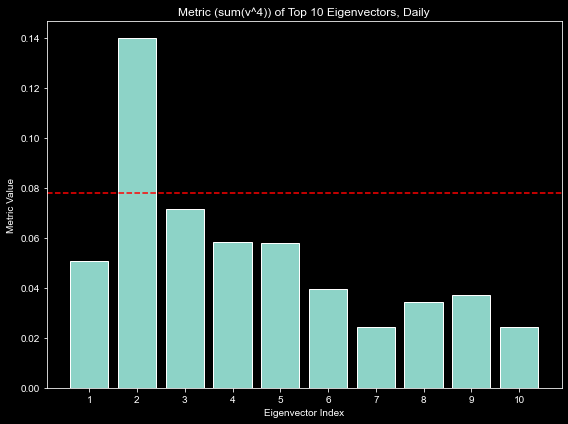

In [306]:
# Compute the metric sum(v^4) for the top 10 eigenvectors
top_10_eigenvectors = eVec_d[-10:]
metric = np.sum(top_10_eigenvectors**4, axis=1)
metric = metric[::-1] # I want to have the top evector as number one and so on

# Plot the metric values
plt.figure(figsize=(8, 6))
plt.bar(range(1, 11), metric)
plt.xlabel('Eigenvector Index')
plt.ylabel('Metric Value')
plt.title('Metric (sum(v^4)) of Top 10 Eigenvectors, Daily')
plt.xticks(range(1, 11))

plt.axhline(y=1/(np.sqrt(len(eVec_d))), color='red', linestyle='--')

plt.show()

In [263]:
1/np.sum(eVec_m**4, axis=1)

array([39.15926817, 48.19619682, 51.36198057, 58.85882112, 54.53520896,
       46.81203135, 59.38538909, 50.89278354, 49.91700841, 46.88947926,
       54.42171788, 57.04660714, 43.03459703, 31.11209366, 55.97372927,
       49.9778563 , 41.59661591, 66.91651405,  8.83550051, 59.55104606,
       33.78496353, 46.07083361, 42.97322662, 48.4896145 , 49.59477649,
       35.3109775 , 32.19012712, 51.87300825, 56.18114661, 47.16666614,
       23.55547822, 57.54874383, 50.93282271, 57.80184641, 38.11544983,
       31.98513078, 38.01254967, 50.93770685, 43.06434674, 47.40502881,
       34.87318795, 38.27449821, 46.8769583 , 57.90004347, 50.67438115,
       32.95705866, 34.62586982, 46.79207225, 50.68019122, 57.61771495,
       53.55115622, 39.77625928, 43.52349667, 34.8233076 , 49.51264157,
       63.9030717 , 55.13843949, 34.54135257, 52.93325669, 38.49306463,
       58.05074488, 42.59260203, 52.01907013, 48.06771071, 52.43049116,
       43.39433041, 53.59956991, 46.31430003, 52.11513686, 45.58

In [189]:
np.sum(eVec_d**4)
a=0
for i in range(len(eVec_d[-1])):
    a += (eVec_d[-1][i])**4
a, sum(eVec_d[-1]**4)

(0.049331654705280704, 0.049331654705280704)

let's compare it with the monthly and weekly 

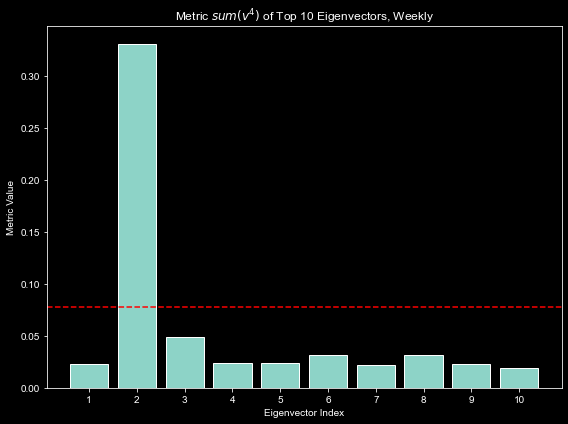

In [311]:
# Compute the metric sum(v^4) for the top 10 eigenvectors
top_10_eigenvectors = eVec_w[-10:]
metric = np.sum(top_10_eigenvectors**4, axis=1)
metric = metric[::-1]

# Plot the metric values
plt.figure(figsize=(8, 6))
plt.bar(range(1, 11), metric)
plt.xlabel('Eigenvector Index')
plt.ylabel('Metric Value')
plt.title('Metric $sum(v^4)$ of Top 10 Eigenvectors, Weekly')
plt.xticks(range(1, 11))

plt.axhline(y=1/(np.sqrt(len(eVec_d[:,0]))), color='red', linestyle='--')

plt.show()

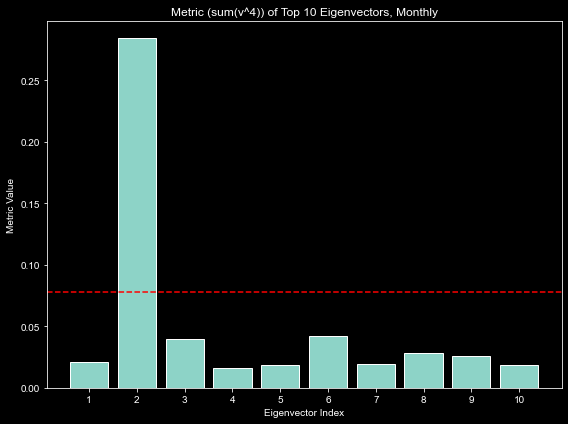

In [308]:
# Compute the metric sum(v^4) for the top 10 eigenvectors
top_10_eigenvectors = eVec_m[-10:]
metric = np.sum(top_10_eigenvectors**4, axis=1)
metric = metric[::-1]

# Plot the metric values
plt.figure(figsize=(8, 6))
plt.bar(range(1, 11), metric)
plt.xlabel('Eigenvector Index')
plt.ylabel('Metric Value')
plt.title('Metric (sum(v^4)) of Top 10 Eigenvectors, Monthly')
plt.xticks(range(1, 11))

plt.axhline(y=1/np.sqrt(len(eVec_d)), color='red', linestyle='--')

plt.show()

### PCA

In [55]:
returns = clean_data(df_day, prd=1)
returns

,AAPL,ABT,ADBE,ADI,ADP,ADSK,AIG,AMAT,AMD,AMGN,...,PKI,PLD,PNC,PNR,PNW,PPG,PPL,PRGO,PRU,PSA
Date,,,,,,,,,,,,,,,,,,,,,
2007-07-26,2.976924,-1.668074,-0.607828,-1.165982,-1.163972,-0.505716,-0.516626,-0.304738,-1.500027,-1.085836,...,-1.802047,-0.234715,-1.416640,-1.253367,-0.790461,-1.849368,-1.756951,-1.626364,-0.731510,-1.151177
2007-07-27,-0.769458,-1.497517,-0.919342,-0.690614,-0.978773,-0.327058,-0.429014,-0.095438,-1.607781,-0.607166,...,3.290429,-1.363460,0.323914,-0.274540,-1.180446,-1.195473,-0.786793,-1.345942,-0.665160,-0.764595
2007-07-30,-0.873734,1.061925,0.536773,0.655426,0.862169,0.479765,-0.037573,0.853041,-0.163323,0.582900,...,0.945066,0.307122,0.922076,0.678539,0.021881,0.899698,1.494128,0.210591,-0.091448,0.758256
2007-07-31,-3.508869,-0.211625,-0.698936,-0.890426,0.465382,-1.366688,-0.355073,0.018635,-0.495681,-2.699789,...,-1.213692,0.054829,-0.882615,-0.784490,-0.561630,-0.783217,0.296108,0.161416,-0.328203,-0.534494
2007-08-01,1.145105,0.324778,-0.835673,1.135868,0.801246,1.209242,0.157154,0.742338,-0.265947,-1.896956,...,0.474362,-0.149750,0.457132,1.198545,1.956075,1.862252,2.038002,1.460015,-0.235698,1.418451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-16,-0.762132,-1.076974,1.319797,0.197934,-0.502327,-0.367965,0.150440,0.048209,-0.460676,0.257147,...,-1.273990,-1.708224,0.041655,-1.236956,-0.665650,-1.137109,-0.511386,-0.192004,-0.620681,-2.074520
2022-12-19,-0.828264,-0.242124,-1.361925,-0.538283,-0.573265,-0.823558,-0.397378,-0.311752,-0.344795,-0.412589,...,0.223188,-0.064324,-0.070663,0.438933,-0.581343,-0.255535,-0.049280,-0.566056,-0.253791,-0.371290
2022-12-20,-0.069418,-0.098263,1.269710,-0.274151,-0.348769,-0.146322,0.514823,-0.213960,0.178874,-0.242795,...,0.407152,0.023314,0.374410,-0.207027,-0.268270,-0.401110,0.105417,0.594193,0.369675,-0.396183


In [57]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(returns)

returns_transformed = pca.transform(returns)
returns_transformed = pd.DataFrame(returns_transformed, columns=['PC1', 'PC2', 'PC3','PC4', 'PC5', 'PC6', 'PC7','PC8', 'PC9', 'PC10'])
returns_transformed

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,14.025426,-2.890762,2.576140,0.331337,-0.206866,0.270916,0.646499,1.615287,0.656286,0.766704
1,10.100385,-3.372894,1.476984,1.021121,0.075918,-0.005353,0.335547,-0.604756,0.166600,0.245310
2,-7.268396,-0.268531,-0.464218,-0.850398,0.556449,-1.157250,-0.645407,1.627116,-0.099554,-0.140313
3,7.791547,-1.381345,-1.660148,-0.169256,0.851793,0.015269,-0.877386,1.001434,0.287393,-1.478748
4,-6.190250,5.200227,-1.552329,-0.395045,2.863361,-0.197355,-0.602288,-0.621876,0.920939,0.813489
...,...,...,...,...,...,...,...,...,...,...
3877,6.776178,-2.213051,0.356516,-0.540100,-0.949541,-0.847153,0.542293,-1.111283,1.449987,1.132979
3878,4.308710,0.430381,-2.108883,0.261237,-1.476752,-0.586574,0.535392,0.053002,1.587059,0.195334
3879,-0.312476,-1.752919,-1.511183,-1.781781,-0.156473,1.507084,-0.929692,0.326113,-0.617063,2.036226
3880,-9.461681,1.088240,0.199029,-1.082753,0.173506,-0.511326,-0.748093,-0.900662,-0.612297,-1.042657


In [58]:
#pca = PCA(n_components=10)
pca = PCA()
pca.fit(returns)

PCA()

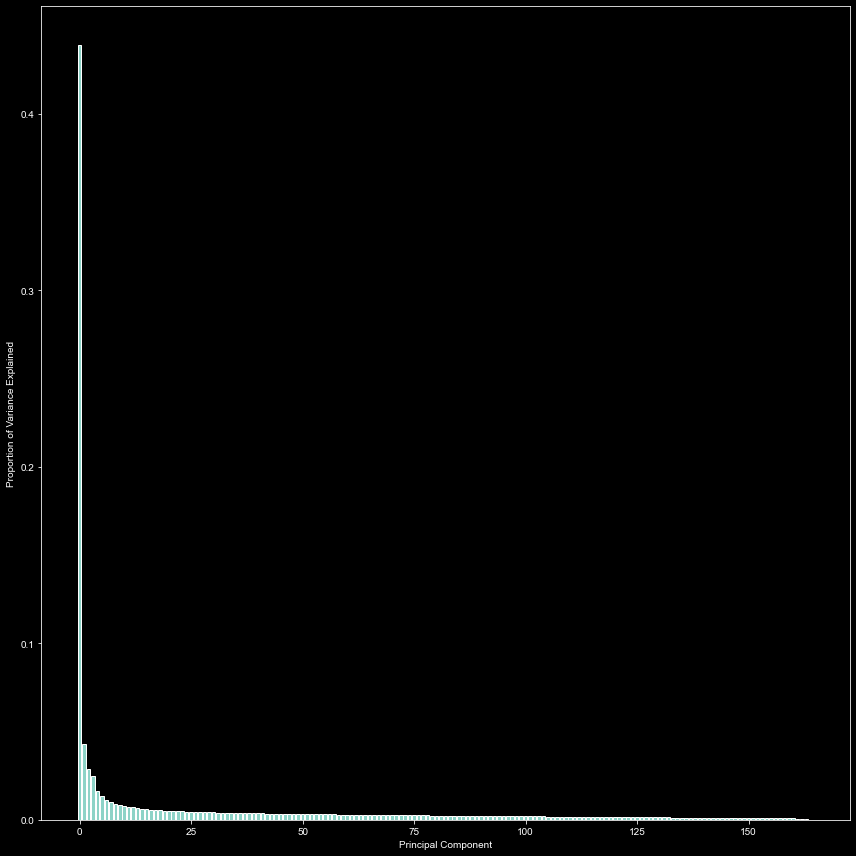

In [59]:
variance_explained = pca.explained_variance_ratio_
plt.bar(range(len(variance_explained)), variance_explained)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [60]:
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_
print(f'the market mode correspond to the eigenvalue: {eigenvalues[0]}')

the market mode correspond to the eigenvalue: 72.42653191759662


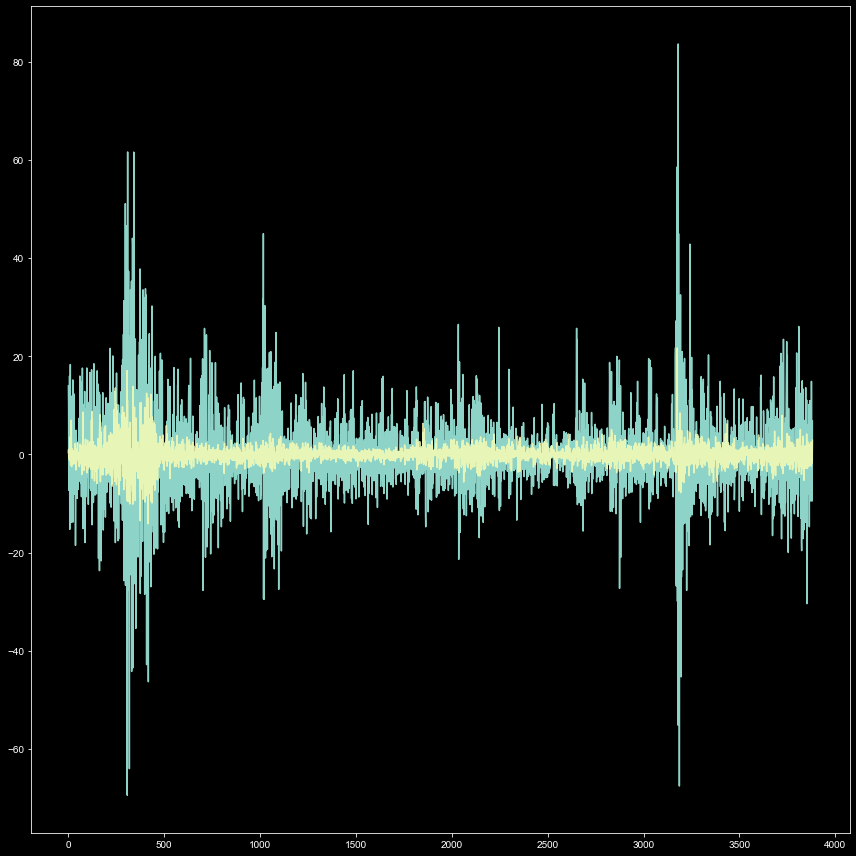

In [61]:
def mode_coefficient(df_returns, mode):
    # Perform PCA on the return dataframe to obtain the eigenvectors and eigenvalues
    pca = PCA().fit(df_returns)
    eigenvectors = pca.components_
    eigenvalues = pca.explained_variance_

    # Compute the mode coefficient for the given mode λ
    mode_vector = eigenvectors[mode]
    mode_coeff = np.dot(mode_vector, df_returns.T)

    return mode_coeff

plt.rcParams["figure.autolayout"] = True
pl1=plt.plot(mode_coefficient(returns, 0), alpha=1)
pl2=plt.plot(mode_coefficient(returns, 3), alpha =0.8)
plt.show()

### Fourier Analysis of modes

 In our case, we can apply Fourier analysis on the mode coefficients to obtain the power spectrum, which shows the relative strength of each frequency component for each mode. This can give us insights into the dominant periodicities of the mode coefficients and help us understand the underlying dynamics of the asset returns.

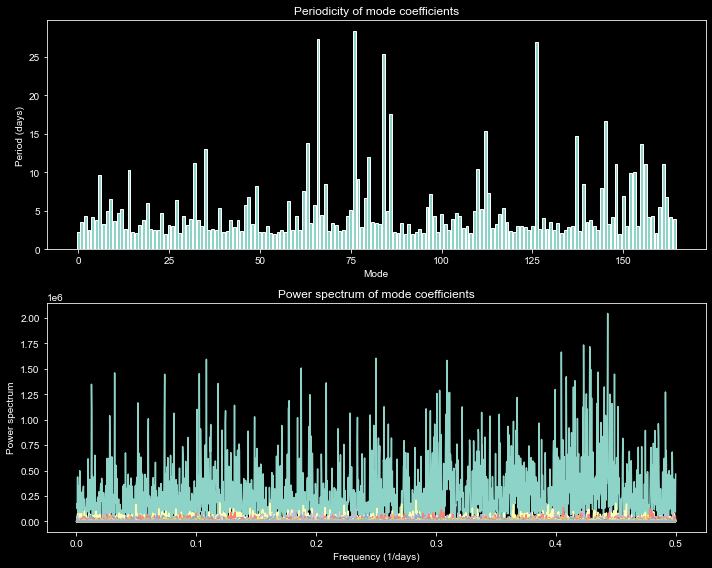

In [65]:
mode_coeffs = []
for i in range(len(eigenvectors)):
    mode_coeffs.append(mode_coefficient(returns, i))

# Perform Fourier analysis on mode coefficients
N = len(mode_coeffs[0])
t = np.arange(N)
periods = []
power_spectra = []
for mode_coeff in mode_coeffs:
    y = mode_coeff - np.mean(mode_coeff)  # remove DC component
    fft_y = np.fft.fft(y)
    freqs = np.fft.fftfreq(N)
    idx = np.argmax(np.abs(fft_y[1:N//2])) + 1
    periods.append(1 / freqs[idx])
    power_spectrum = np.abs(fft_y)**2
    power_spectra.append(power_spectrum[1:N//2])

# Plot results
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
axs[0].bar(range(len(eigenvectors)), periods)
axs[0].set_xlabel('Mode')
axs[0].set_ylabel('Period (days)')
axs[0].set_title('Periodicity of mode coefficients')
axs[1].plot(freqs[1:N//2], np.array(power_spectra).T)
axs[1].set_xlabel('Frequency (1/days)')
axs[1].set_ylabel('Power spectrum')
axs[1].set_title('Power spectrum of mode coefficients')
plt.show()

In [476]:
returns.shape[1]

165

In [66]:
print(f"the period of the first mode is: {periods[0]}")
print(f"the period of the second mode is: {periods[1]}")

the period of the first mode is: 2.2569767441860464
the period of the second mode is: 3.532302092811647


In [458]:
returns.shape[1]

165

Figure with two subplots. 

1) The first subplot shows the periods of the modes as before

2) The second subplot shows the power spectrum of the Fourier transform for each mode, where the x-axis is the frequency (in 1/days) and the y-axis is the relative strength of each frequency component.

**Component Plot**

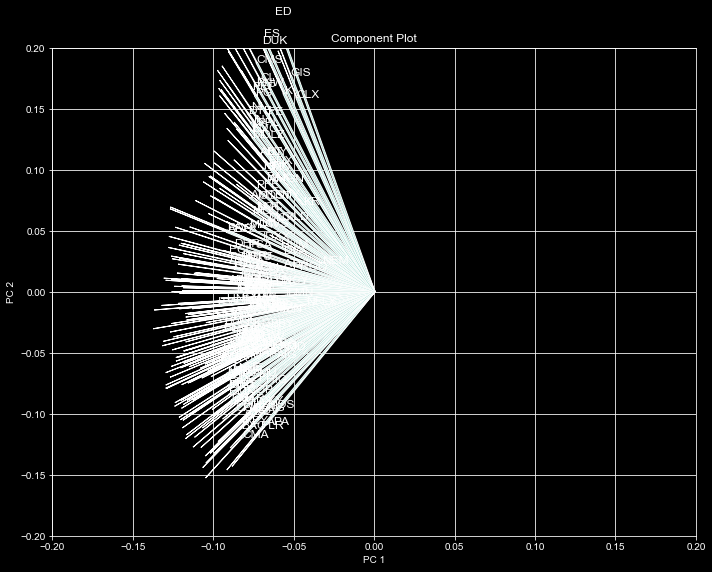

In [67]:
# Create component plot for first two principal components
plt.rcParams['figure.figsize'] = [15,12]
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_title('Component Plot')

for i, asset in enumerate(returns.columns):
    ax.arrow(0, 0, eigenvectors[0,i], eigenvectors[1,i], head_width=0.0005, head_length=0.04)
    ax.text(eigenvectors[0,i], eigenvectors[1,i], asset, fontsize=12)

plt.xlim([-0.2, 0.2])
plt.ylim([-0.2, 0.2])
plt.grid()
plt.show()

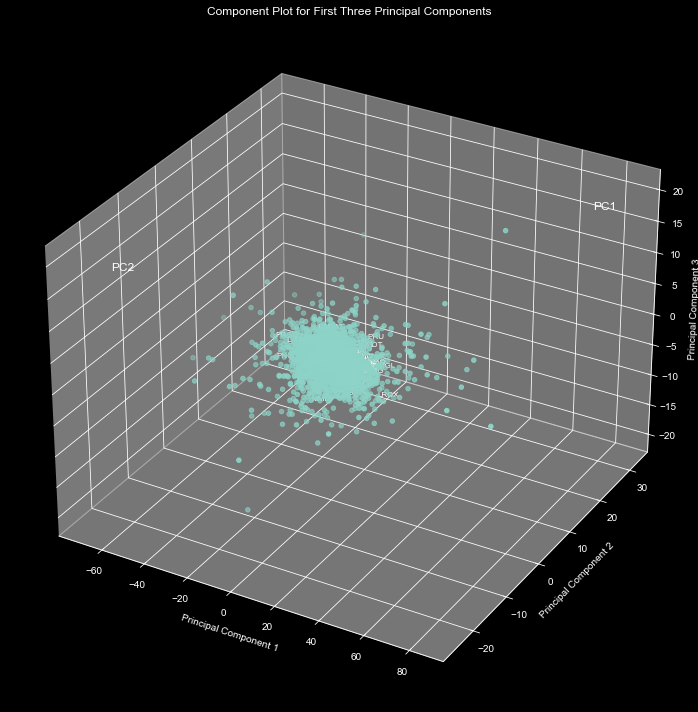

In [68]:
# Compute the PCA and extract the first three principal components
pca = PCA()
principal_components = pca.fit_transform(returns)
pc1 = principal_components[:, 0]
pc2 = principal_components[:, 1]
pc3 = principal_components[:, 2]

# Get the asset names from the original dataframe
assets = returns.columns.tolist()

# Compute the loadings of each asset on the first three principal components
loadings = pca.components_[:3, :].T

# Create the component plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pc1, pc2, pc3)

# Add labels for each asset
for i, asset in enumerate(assets):
    ax.text(pc1[i], pc2[i], pc3[i], asset, fontsize=8)

# Add arrows representing the loadings of each asset on the first three principal components
for i in range(len(assets)):
    arrow_start = np.array([0, 0, 0])
    arrow_direction = loadings[i, :]
    ax.quiver(*arrow_start, *arrow_direction, length=0.3)

# Add labels for each principal component
ax.text(0.9 * pc1.max(), 0.9 * pc2.max(), 0.9 * pc3.max(), 'PC1', fontsize=12)
ax.text(0.9 * pc1.min(), 0.9 * pc2.min(), 0.9 * pc3.max(), 'PC2', fontsize=12)
ax.text(0.9 * pc1.min(), 0.9 * pc2.max(), 0.9 * pc3.min(), 'PC3', fontsize=12)

# Set the axis labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Component Plot for First Three Principal Components')

# Show the plot
plt.show()

### Testing non linearities - Examples

Before building a model for the data, e.g. for prediction purposes, it is advisable to check whether the data alone suggest this type of modelling. Why
put effort on modelling economic relationships at all if the pertaining data
cannot be distinguished from white noise?

In [69]:
# Define a function to generate surrogate data
def generate_surrogates_permutation(x, n_surrogates): # simpler method
    n = len(x)
    surrogates = np.zeros((n_surrogates, n))
    for i in range(n_surrogates):
        idx = np.random.permutation(n)
        surrogates[i, :] = x[idx]
    return surrogates

def generate_surrogates(x, n_surrogates): # more advanced method 
    """
    Generate surrogate datasets by shuffling the phase information of x.

    Parameters:
    -----------
    x: array-like
        The original time-series data.
    n_surrogates: int
        The number of surrogate datasets to generate.

    Returns:
    --------
    x_surrogates: 2D array
        An array of surrogate datasets with shape (n_surrogates, nsteps).
    """
    nsteps = len(x)
    x_surrogates = np.zeros((n_surrogates, nsteps))
    
    for i in range(n_surrogates):
        x_fft = np.fft.fft(x)
        x_amplitude = np.abs(x_fft)
        x_phase = np.angle(x_fft)
        np.random.shuffle(x_phase)
        x_fft_shuffled = x_amplitude * np.exp(1j*x_phase)
        x_surrogate = np.real(np.fft.ifft(x_fft_shuffled))
        x_surrogates[i,:] = x_surrogate
    
    return x_surrogates

import nolds

def test_nonlinearities(x, surrogates, emb_dim):
    # Calculate the correlation dimension for the original time series
    corr_dim = nolds.corr_dim(x, emb_dim)
    n_surrogates = len(surrogates)
      
    # Calculate the correlation dimension for each surrogate
    surrogate_dims = []
    for surrogate in surrogates:
        surrogate_dim = nolds.corr_dim(surrogate, emb_dim)
        surrogate_dims.append(surrogate_dim)
    
    # Compute the discriminating statistic
    mean_surrogate_dim = np.mean(surrogate_dims)
    std_surrogate_dim = np.std(surrogate_dims, ddof=1)
    discriminating_statistic = (corr_dim - mean_surrogate_dim) / std_surrogate_dim
    
    # Return the discriminating statistic and the surrogate dimensions
    return discriminating_statistic, surrogate_dims

How to comute the surrogates data

1-Compute the Fourier transform of x using np.fft.fft().

2-Compute the amplitude and phase information of the Fourier transform using np.abs() and np.angle(), respectively.

3-Shuffle the phase information randomly using np.random.shuffle().

4-Reconstruct the Fourier transform using the shuffled phase information and the original amplitude information.

5-Compute the inverse Fourier transform of the reconstructed Fourier transform using np.fft.ifft().

6-Store the resulting time-series in an array of surrogate datasets x_surrogates.

**Test with Lorentz attractor**

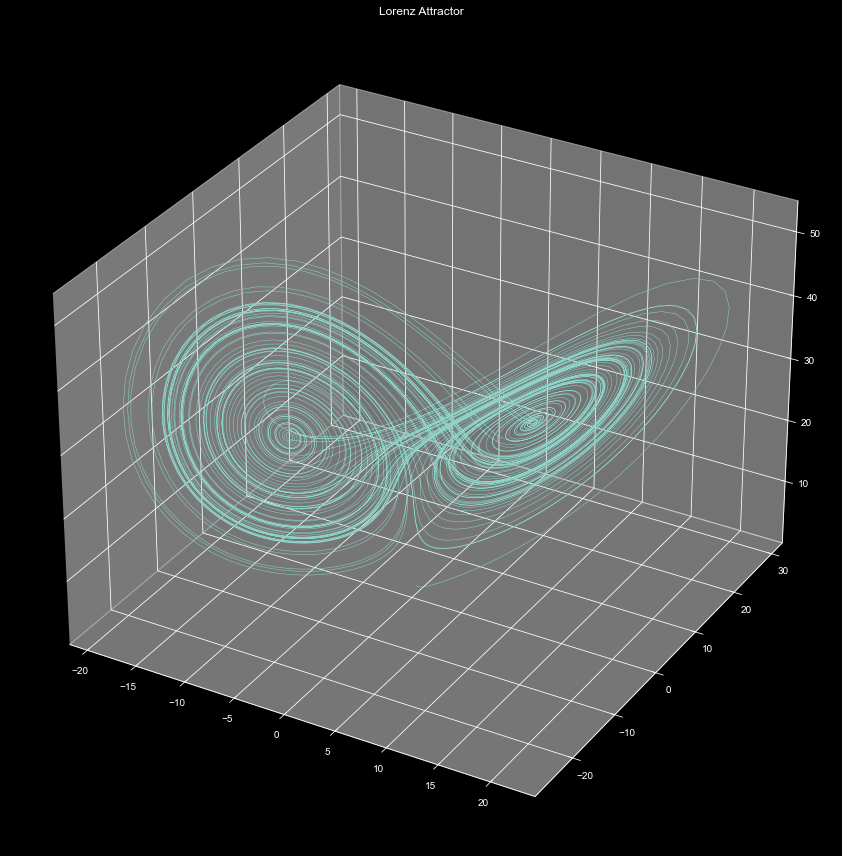

In [70]:
def lorenz(x, y, z, s=10, r=28, b=2.667):
    '''Given:
       x, y, z: a point of interest in three dimensional space
       s, r, b: parameters defining the lorenz attractor
    Returns:
       x_dot, y_dot, z_dot: values of the lorenz attractor's partial derivatives at the point x, y, z'''
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot

dt = 0.01
num_steps = 10000

# Need one more for the initial values
xs = np.empty(num_steps + 1)
ys = np.empty(num_steps + 1)
zs = np.empty(num_steps + 1)

# Set initial values
xs[0], ys[0], zs[0] = (0., 1., 1.05)

# Step through "time", calculating the partial derivatives at the current point and using them to estimate the next point
for i in range(num_steps):
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)

# Plot the attractor
ax = plt.figure().add_subplot(projection='3d')
ax.plot(xs, ys, zs, lw=0.5)
ax.set_title("Lorenz Attractor")
plt.show()

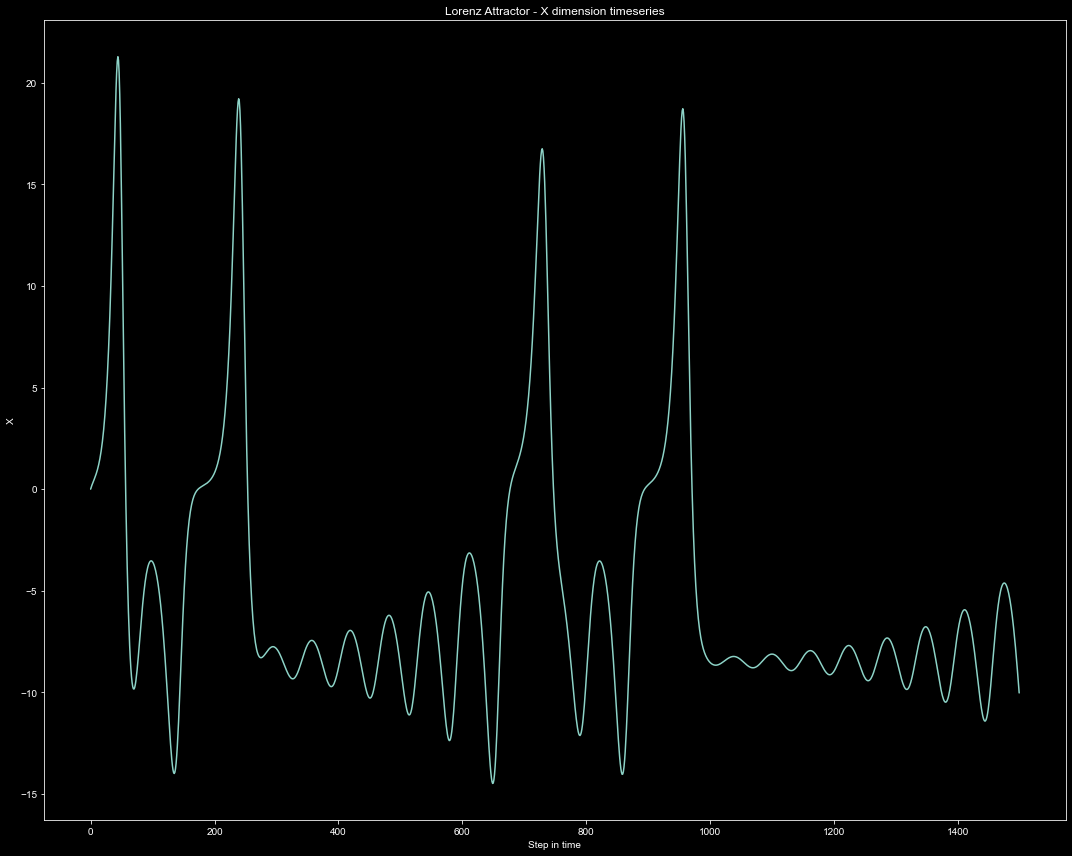

In [71]:
# plot only X dimension, the first 1500 steps

plt.plot(range(num_steps)[:1500], xs[:1500])
plt.title("Lorenz Attractor - X dimension timeseries")
plt.xlabel("Step in time")
plt.ylabel("X")
plt.show()

**Lotka-Volterra**

The Lotka-Volterra equations describe the dynamics of two interacting species in an ecosystem, where one species is the predator and the other is the prey. The equations can be written as follows:

$ \frac{dx}{dt} = ax - bxy $

$ \frac{dy}{dt} = dxy - cy$

where x represents the population size of the prey, y represents the population size of the predator, and a, b, d, and c are parameters that determine the behavior of the system.

*with added noise*

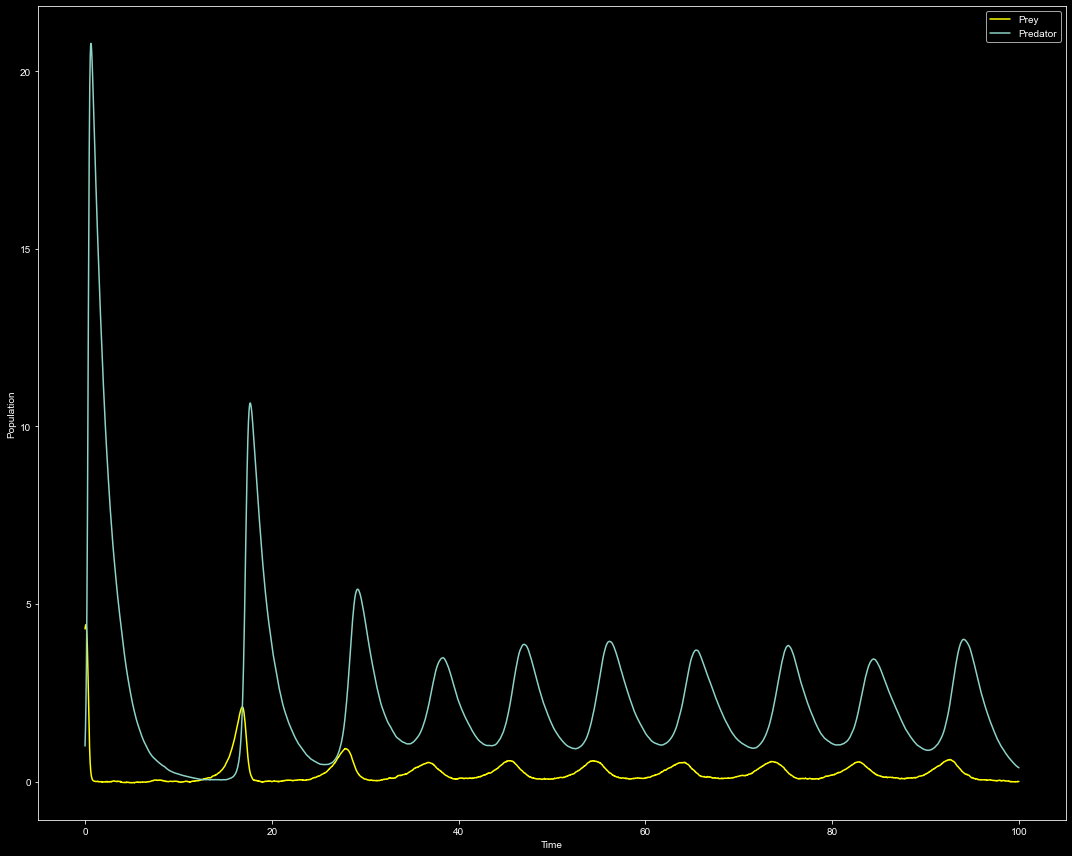

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# define the Lotka-Volterra model parameters
alpha = 1.0
beta = 0.5
gamma = 0.5
delta = 2.0

# define the simulation parameters
t0 = 0
tf = 100
dt = 0.01
nsteps = int((tf - t0) / dt)

# set the random seed for reproducibility
np.random.seed(123)

# initialize the prey and predator populations
x = np.zeros(nsteps)
y = np.zeros(nsteps)
x[0] = 4.3
y[0] = 1

# simulate the Lotka-Volterra model with added noise
for i in range(1, nsteps):
    dxdt = alpha*x[i-1] - beta*x[i-1]*y[i-1] + np.random.normal(scale=0.2)
    dydt = delta*x[i-1]*y[i-1] - gamma*y[i-1] + np.random.normal(scale=0.1)
    x[i] = x[i-1] + dxdt*dt
    y[i] = y[i-1] + dydt*dt

# plot the results
fig, ax = plt.subplots()
ax.plot(np.arange(t0, tf, dt), x, label='Prey', color='yellow')
ax.plot(np.arange(t0, tf, dt), y, label='Predator')
ax.set_xlabel('Time')
ax.set_ylabel('Population')
ax.legend()
plt.show()

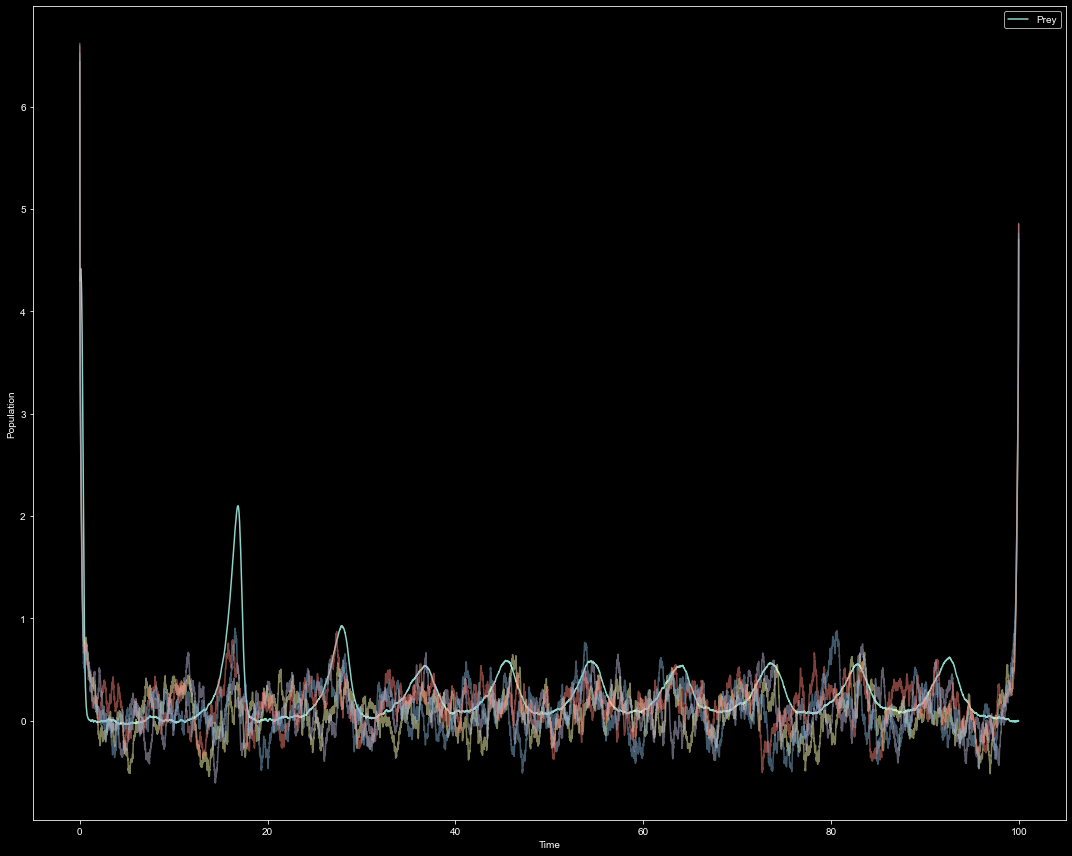

In [73]:
x_surrogates = generate_surrogates(x, 50)

# plot a few of the surrogates
n_plot = 4
fig, ax = plt.subplots()
ax.plot(np.arange(t0, tf, dt), x, label='Prey')
for i in range(n_plot):
    ax.plot(np.arange(t0, tf, dt), x_surrogates[i,:], alpha=0.5)
ax.set_xlabel('Time')
ax.set_ylabel('Population')
ax.legend()
plt.show()

**Discriminating Statistics**

correlation dimension

https://github.com/notsebastiano/GP_algorithm

We plot a histogram of the surrogate dimensions, and overlay a vertical line indicating the value of the discriminating statistic. If the value of the discriminating statistic is far from the distribution of the surrogate dimensions, then we can conclude that the time series has nonlinearities. Otherwise, we cannot reject the null hypothesis that the time series is linear.

The null hypothesis is that the original time series is generated by a linear stochastic process, and therefore its correlation dimension should be similar to the correlation dimensions of the surrogates. If the correlation dimension of the original time series is significantly different from the correlation dimensions of the surrogates, then we reject the null hypothesis and conclude that the time series exhibits nonlinear dynamics.

In [74]:
#x & x_surrogates are the data I will use
n_surrogates = 50
x_surrogates = [generate_surrogates(x, 1)[0] for i in range(n_surrogates)]

# Test for nonlinearities
emb_dim = 3
disc_stat, surrogate_dims = test_nonlinearities(x, x_surrogates, emb_dim)

# Plot the results
fig, ax = plt.subplots()
ax.hist(surrogate_dims, bins=20, alpha=0.5, label='Surrogates')
ax.axvline(x=disc_stat, color='r', label='Discriminating Statistic')
ax.legend()
plt.show()

KeyboardInterrupt: 

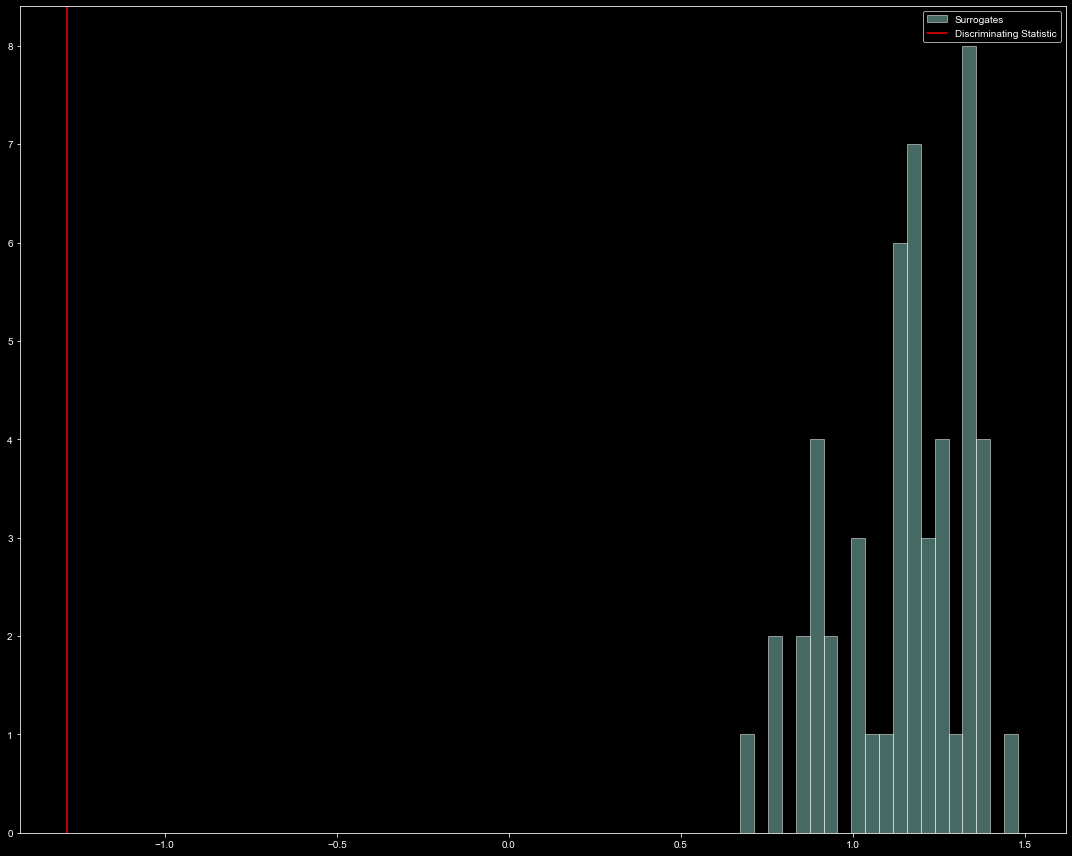

In [75]:
#x = np.random.rand(1000)
x_ex = xs[:100]

#x & x_surrogates are the data I will use
n_surrogates = 50
x_surrogates = [generate_surrogates(x_ex, 1)[0] for i in range(n_surrogates)]

# Test for nonlinearities
emb_dim = 3
disc_stat, surrogate_dims = test_nonlinearities(x_ex, x_surrogates, emb_dim)

# Plot the results
fig, ax = plt.subplots()
ax.hist(surrogate_dims, bins=20, alpha=0.5, label='Surrogates')
ax.axvline(x=disc_stat, color='r', label='Discriminating Statistic')
ax.legend()
plt.show()

mutual information

In [76]:
import numpy as np
from sklearn.metrics import mutual_info_score

# Define a function to calculate the surrogate data significance level (SDSL)
def calculate_sdsl(mi, mi_surrogates):
    n_surrogates = len(mi_surrogates)
    count = np.sum(mi_surrogates >= mi)
    return (count + 1) / (n_surrogates + 1)

# Calculate the observed mutual information
mi_observed = mutual_info_score(x[:-1], x[1:])

# Set the number of surrogates to generate
n_surrogates = 1000
# Generate surrogate data
surrogates = generate_surrogates(x, n_surrogates)

# Calculate the mutual information for each surrogate
mi_surrogates = np.zeros(n_surrogates)
for i in range(n_surrogates):
    mi_surrogates[i] = mutual_info_score(surrogates[i, :-1], surrogates[i, 1:])

# Calculate the average mutual information for the surrogates
mi_expected = np.mean(mi_surrogates)

# Calculate the surrogate data significance level (SDSL)
sdsl = calculate_sdsl(mi_observed, mi_surrogates)

# Print the results
print('Observed mutual information: {:.4f}'.format(mi_observed))
print('Expected mutual information: {:.4f}'.format(mi_expected))
print('Surrogate data significance level: {:.4f}'.format(sdsl))

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuo

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuo

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuo

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuo

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuo

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuo

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuo

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuo

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuo

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuo

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuo

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuo

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuo

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuo

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuo

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuo

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuo

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuo

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuo

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuo

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuo

/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuo

Observed mutual information: 9.2102
Expected mutual information: 9.2102
Surrogate data significance level: 1.0000


/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/Users/pietrobicocchi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuo

NameError: name 'nu_surrogates' is not defined

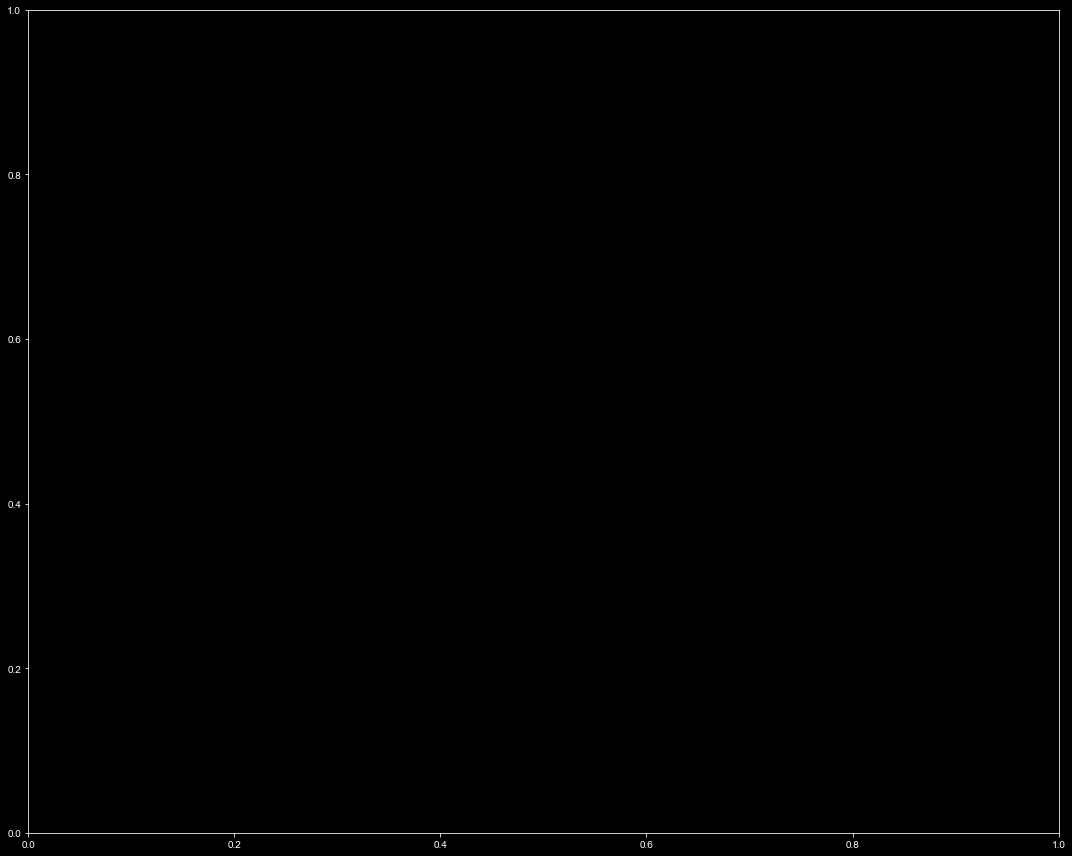

In [77]:
fig, ax = plt.subplots()
ax.hist(nu_surrogates, bins=10000, density=True)
ax.axvline(x=nu, color='r', label='Original Data')
ax.set_xlabel('Discriminating Statistic')
ax.set_ylabel('Density')
ax.set_title('Surrogate Data Distribution')
ax.set_xlim(0,1000)
ax.legend()
plt.show()

cross correlation

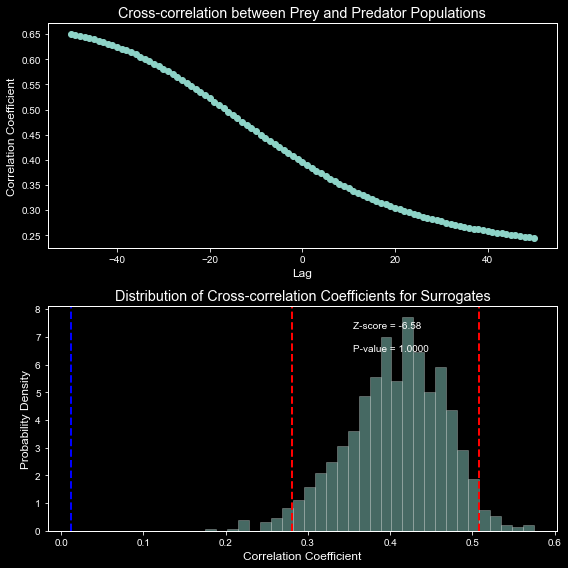

In [636]:
# compute the cross-correlation between the original time-series and surrogates
ccf_surrogates = np.zeros(n_surrogates)
for i in range(n_surrogates):
    ccf_surrogates[i] = np.corrcoef(x, x_surrogates[i,:])[0,1]

# compute the z-score and p-value for the original time-series
ccf_observed = np.corrcoef(x, y)[0,1]
zscore = (ccf_observed - np.mean(ccf_surrogates)) / np.std(ccf_surrogates)
pvalue = sum(ccf_surrogates > ccf_observed) / n_surrogates

# plot the results
fig, axs = plt.subplots(2, 1, figsize=(8,8))

# plot the cross-correlation functions
axs[0].xcorr(x, y, usevlines=False, maxlags=50, normed=True, lw=2)
axs[0].set_title('Cross-correlation between Prey and Predator Populations')
axs[0].set_xlabel('Lag')
axs[0].set_ylabel('Correlation Coefficient')

# plot the distribution of cross-correlation coefficients for surrogates
axs[1].hist(ccf_surrogates, bins=30, density=True, alpha=0.5)
axs[1].axvline(ccf_observed, color='b', linestyle='dashed', linewidth=2)
axs[1].set_title('Distribution of Cross-correlation Coefficients for Surrogates')
axs[1].set_xlabel('Correlation Coefficient')
axs[1].set_ylabel('Probability Density')

# plot the p-value and z-score
axs[1].annotate("Z-score = {:.2f}".format(zscore), xy=(0.6, 0.9), xycoords='axes fraction')
axs[1].annotate("P-value = {:.4f}".format(pvalue), xy=(0.6, 0.8), xycoords='axes fraction')
axs[1].axvline(np.percentile(ccf_surrogates, 2.5), color='r', linestyle='dashed', linewidth=2)
axs[1].axvline(np.percentile(ccf_surrogates, 97.5), color='r', linestyle='dashed', linewidth=2)

You can select a principal component and its coefficients for analysis (in this example, the first principal component is selected). then, you can test nonlinearity in the selected mode using the 'test_nonlinearity' function, which returns a p-value indicating the likelihood of nonlinearity in the mode. If the p-value is low (e.g., less than 0.05), there is evidence of nonlinearity in the mode.

https://www.tau.ac.il/lifesci/zoology/members/lewi_files/documents/Hinich_SNDE_2005.pdf
https://typeset.io/pdf/testing-for-nonlinearity-in-time-series-the-method-of-3obg021lq4.pdf

**Test with mode coefficient**

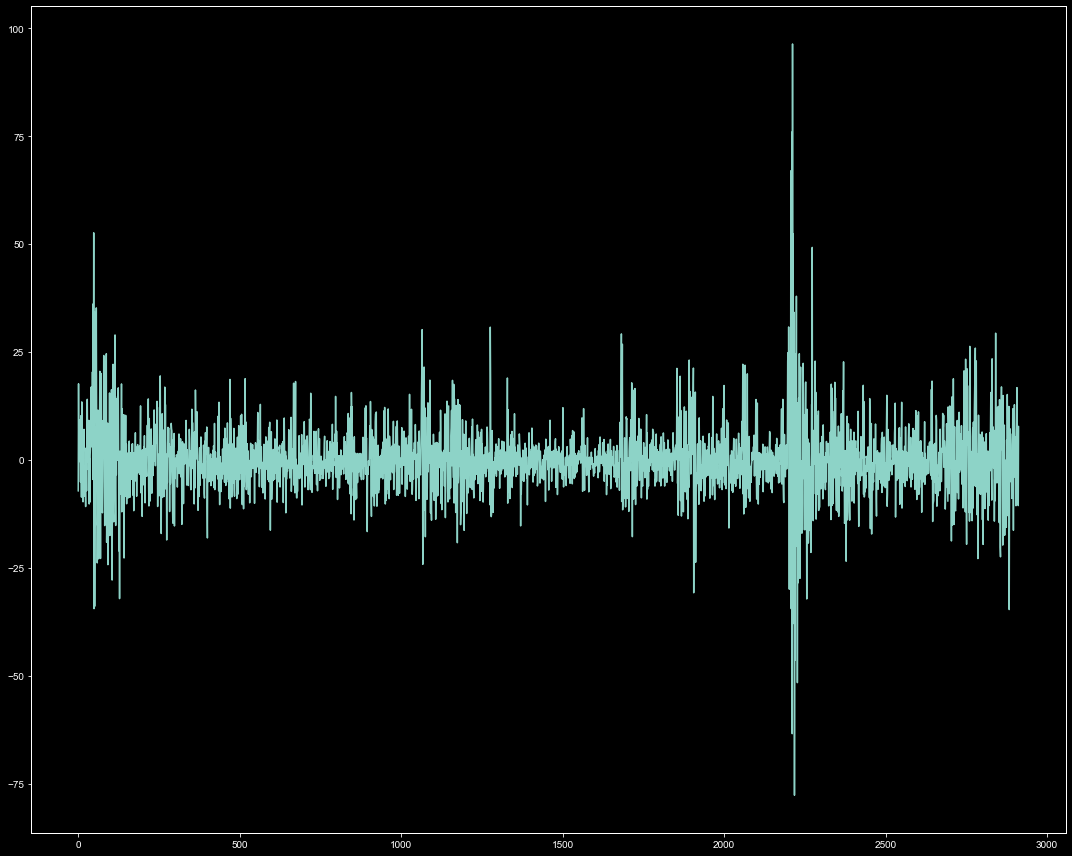

In [693]:
mode_1 = mode_coefficient(returns, 0)
plt.plot(mode_1)

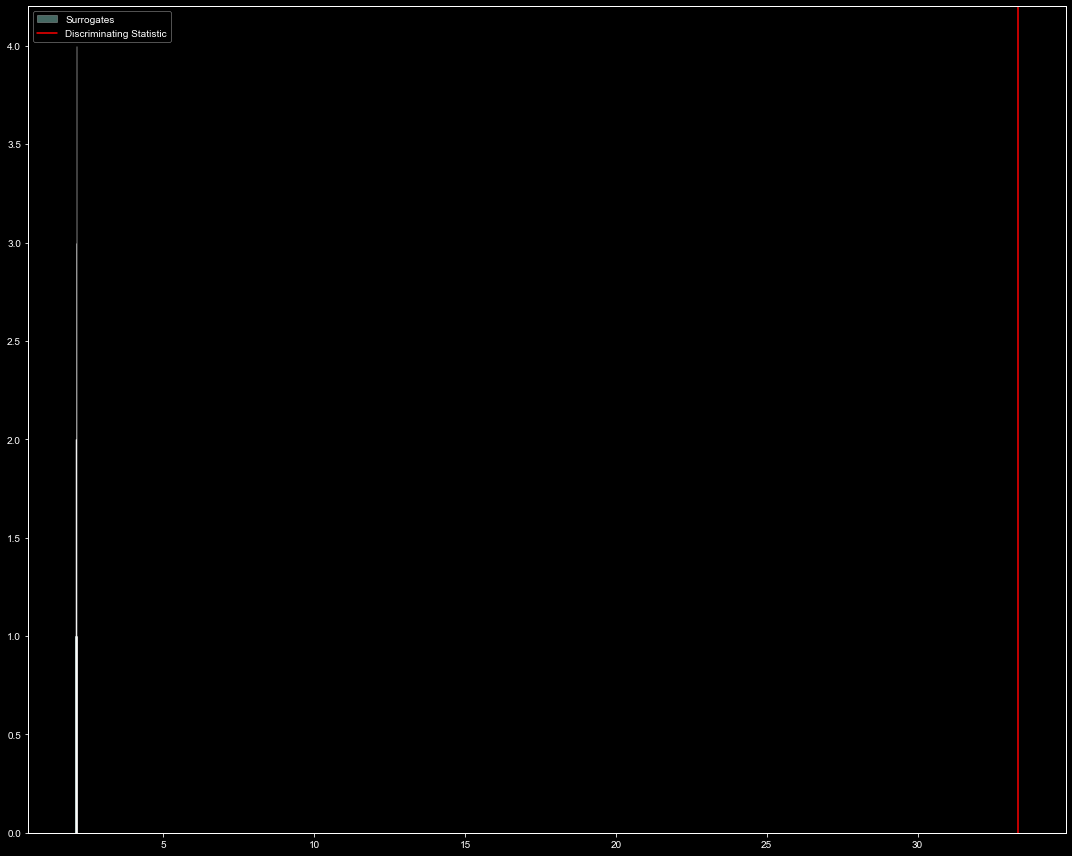

In [695]:
x = mode_1
n_surrogates = 50
x_surrogates = [generate_surrogates(x, 1)[0] for i in range(n_surrogates)]

# Test for nonlinearities
emb_dim = 3
disc_stat, surrogate_dims = test_nonlinearities(x, x_surrogates, emb_dim)

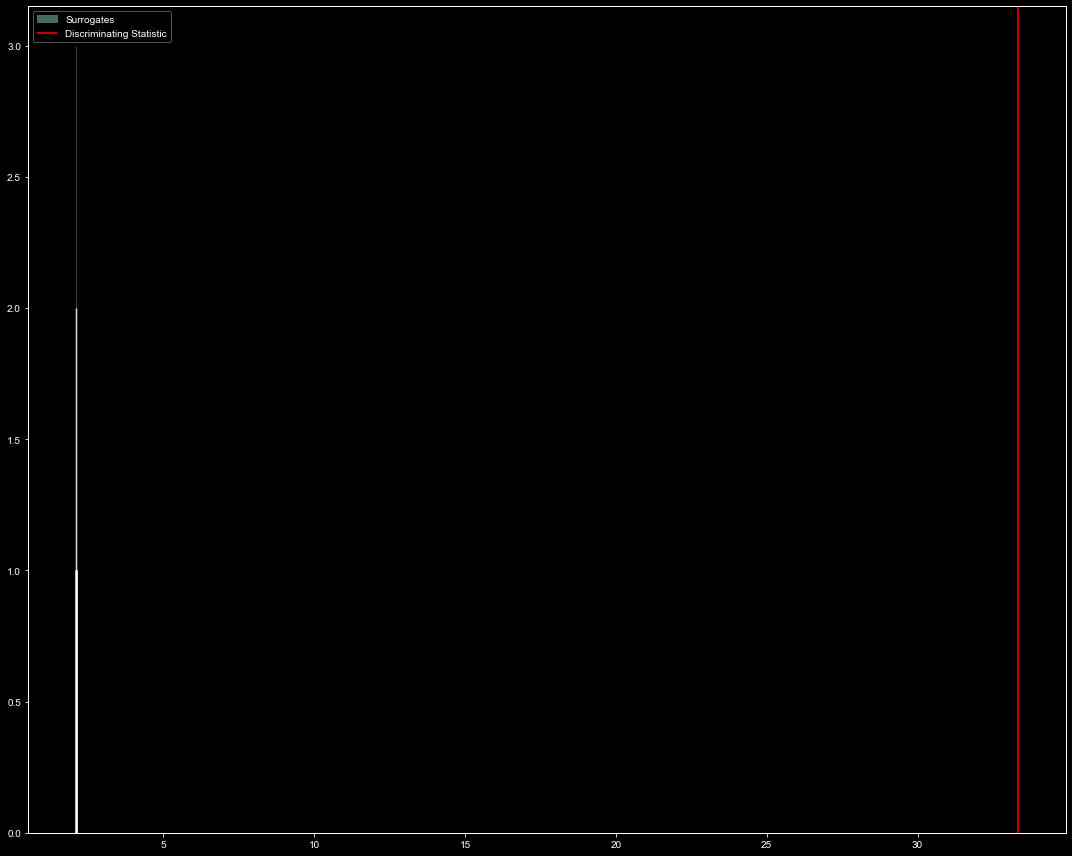

In [699]:
# Plot the results
fig, ax = plt.subplots()
ax.hist(surrogate_dims, bins=150, alpha=0.5, label='Surrogates')
ax.axvline(x=disc_stat, color='r', label='Discriminating Statistic')
ax.legend()
plt.show()

## Lagged - correlations

In [78]:
returns = clean_data(df_day, prd=1)

In [79]:
def lagged_correlation(returns, tau=0):
    '''
    Lagged correlation matrix with shift = τ
    
    Parametres: 
        - returns = dataframe pandas with all the rescaled log-returns of the stocks
        - tau = lagging time
    Returns: 
        cross correlation matrix 
                
    '''
    cross_corr_matrix = pd.DataFrame(columns=returns.columns, index=returns.columns) # initialize the matrix

    for i in range(len(returns.columns)):
        for j in range(len(returns.columns)):
            cross_corr_matrix.iloc[i,j] = round(np.correlate(returns.iloc[:,i], returns.iloc[tau:,j], mode='valid')[0]/(len(returns) - tau), 4)# definition of correlation
    return cross_corr_matrix #justified a posteriori looking at the values on the diagonal

In [80]:
lagged_corr=lagged_correlation(returns, tau = 50)
lagged_corr

,AAPL,ABT,ADBE,ADI,ADP,ADSK,AIG,AMAT,AMD,AMGN,...,PKI,PLD,PNC,PNR,PNW,PPG,PPL,PRGO,PRU,PSA
AAPL,-0.0155,-0.0226,-0.0365,-0.0396,-0.053,-0.0226,-0.0247,-0.0163,-0.0434,-0.0385,...,-0.0346,-0.0124,0.0293,-0.0322,-0.019,-0.0247,-0.0165,-0.0055,-0.0122,-0.0147
ABT,-0.0168,-0.0472,-0.0305,-0.0195,-0.0197,-0.0211,-0.0308,-0.0174,-0.0073,-0.0182,...,-0.0262,-0.0125,-0.0003,-0.0235,-0.0182,-0.0191,-0.0283,0.0136,-0.0035,-0.011
ADBE,-0.0311,-0.0252,-0.058,-0.0338,-0.0514,-0.0431,-0.0135,-0.0211,-0.031,-0.0245,...,-0.0308,-0.0465,-0.015,-0.0417,-0.0336,-0.0378,-0.0322,-0.0098,-0.0416,-0.0442
ADI,-0.0131,-0.0345,-0.0421,-0.025,-0.0367,-0.0173,-0.0026,-0.0212,-0.0197,-0.0194,...,-0.0239,-0.0302,0.0076,-0.0384,-0.0497,-0.0234,-0.0254,-0.0058,-0.0257,-0.0407
ADP,-0.0209,-0.0248,-0.0371,-0.0311,-0.053,-0.0226,-0.0188,-0.0136,-0.0224,-0.0156,...,-0.0314,-0.0152,0.0013,-0.0266,-0.0312,-0.0273,-0.0296,0.0031,-0.0199,-0.0198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PPG,-0.0237,-0.0379,-0.0461,-0.0142,-0.0332,-0.0304,0.0141,-0.0047,-0.0358,-0.0212,...,-0.0206,-0.0037,0.0192,-0.0361,0.0022,-0.0149,-0.0019,-0.0074,-0.0209,-0.0034
PPL,-0.0085,-0.0245,-0.015,-0.0215,-0.038,-0.015,0.0202,-0.0089,-0.0186,-0.0368,...,-0.0123,-0.0091,0.0184,-0.0207,-0.0145,-0.0158,-0.031,-0.0001,0.0046,-0.0313
PRGO,-0.0108,0.0011,-0.0307,-0.0342,-0.014,-0.0092,-0.0149,-0.0155,-0.0098,-0.0048,...,-0.0121,-0.0266,-0.0058,-0.0079,-0.0182,-0.0423,-0.0326,0.0156,-0.0074,-0.0371
PRU,-0.028,-0.0094,-0.0233,-0.0198,-0.0264,-0.0101,-0.0019,-0.0076,-0.0317,-0.0211,...,-0.0103,-0.0149,0.0297,-0.0193,0.0003,-0.0081,-0.0035,0.0001,-0.0361,-0.0169


What happens if I compute the lagged correlation for significant periods obtained from the coefficient modes, i.e. periods for which the intensity of the meaning of the contribute of the first mode appears.

In [81]:
# first mode period
lagged_corr=lagged_correlation(returns, tau = 2)
lagged_corr

,AAPL,ABT,ADBE,ADI,ADP,ADSK,AIG,AMAT,AMD,AMGN,...,PKI,PLD,PNC,PNR,PNW,PPG,PPL,PRGO,PRU,PSA
AAPL,-0.0172,0.0098,0.0022,-0.009,0.0195,-0.0099,0.0134,0.0162,0.0223,-0.0104,...,-0.0271,0.0157,0.021,-0.0253,0.0458,-0.0178,0.0187,0.0002,0.0096,-0.0044
ABT,-0.0008,-0.0101,0.0024,-0.0179,0.0008,-0.0149,-0.0075,0.0248,0.0144,-0.0215,...,-0.0197,-0.0199,0.0197,-0.0322,0.0326,-0.0275,-0.0105,-0.0233,-0.04,-0.0273
ADBE,0.0045,-0.006,-0.0061,0.0025,-0.0109,-0.0144,0.0292,0.0185,0.0157,-0.0047,...,-0.0152,0.0005,0.0223,-0.0156,0.0311,-0.0099,0.001,-0.0208,-0.0157,-0.029
ADI,0.0013,0.0025,0.0124,0.0119,0.0092,0.0125,0.018,0.0222,0.0177,-0.0093,...,-0.0195,-0.0034,0.0156,-0.0148,0.0518,-0.0014,0.0062,0.0002,-0.0199,-0.024
ADP,0.0061,0.0067,0.0114,0.0211,0.0372,-0.0169,0.0185,0.0381,0.0237,-0.0041,...,-0.0329,-0.0161,0.0013,-0.0112,0.0441,-0.0077,0.0211,-0.0016,-0.0531,-0.0159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PPG,0.0182,0.0038,-0.0005,-0.0035,0.0276,-0.0012,0.0278,0.0359,0.0096,0.0163,...,-0.0243,0.0253,0.0255,0.0167,0.0665,0.0047,0.0348,0.0162,-0.0078,-0.0016
PPL,0.026,0.0437,0.048,0.0146,0.0549,0.0246,0.019,0.0467,0.044,0.019,...,0.0073,0.0405,0.036,0.0107,0.063,0.008,0.0225,0.0253,-0.0115,0.0173
PRGO,-0.006,-0.0001,-0.0237,-0.009,-0.0221,-0.0187,0.0424,-0.0072,-0.0032,-0.0135,...,-0.0111,-0.0079,-0.0221,-0.0378,0.0389,-0.0336,0.0057,-0.0518,-0.0438,-0.0133
PRU,-0.0039,0.0141,-0.006,-0.0061,0.0417,-0.0106,0.0741,0.0218,0.0188,-0.019,...,-0.0275,0.0017,0.0245,-0.02,0.0479,-0.0048,-0.0013,-0.002,-0.0217,-0.0289


In [704]:
# first mode period
lagged_corr=lagged_correlation(returns, tau = 5)
lagged_corr

,AAPL,ABT,ADBE,ADI,ADP,ADSK,AIG,AMAT,AMD,AMGN,...,PKI,PLD,PNC,PNR,PNW,PPG,PPL,PRGO,PRU,PSA
AAPL,0.0132,0.026,-0.0004,0.0135,0.0352,0.0036,-0.0092,0.01,0.004,0.0122,...,0.0267,0.029,0.0223,0.0185,0.0194,0.0361,0.0258,0.0084,0.0153,0.0092
ABT,-0.0051,0.0116,-0.0074,0.0104,0.0198,0.0114,0.0085,-0.0198,-0.0022,-0.013,...,0.0078,0.0203,0.038,0.0239,0.0567,0.049,0.0307,-0.0106,0.0167,-0.0026
ADBE,-0.0077,0.0141,-0.0164,-0.0034,0.0241,-0.0052,-0.0296,-0.0057,0.0019,0.024,...,0.0142,0.0318,0.0277,0.0197,0.0481,0.0361,0.048,0.0064,-0.0022,0.0102
ADI,0.033,0.0367,0.0239,0.0335,0.0528,0.0303,-0.016,0.0363,0.01,0.0171,...,0.0405,0.0266,0.0169,0.0366,0.0383,0.0443,0.0468,0.0,-0.0147,0.0031
ADP,0.0103,0.0224,0.001,-0.0084,0.0374,-0.0079,-0.0418,-0.0136,-0.0076,0.0316,...,-0.0021,0.0259,0.0052,0.0188,0.0362,0.0283,0.0301,-0.0261,-0.0248,0.0182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PPG,0.0241,0.0145,0.0102,-0.0027,0.0092,0.0085,-0.0303,0.0124,0.0204,0.0042,...,0.0068,-0.0024,0.017,0.022,0.0179,0.0123,0.013,-0.0171,-0.0066,-0.0122
PPL,0.0153,0.0275,-0.0113,-0.0021,0.0208,-0.015,-0.0302,-0.0237,0.0083,-0.0007,...,0.0252,0.0102,-0.001,0.018,0.0114,0.0263,-0.0025,-0.0179,-0.0049,0.0228
PRGO,-0.0236,-0.0182,-0.0131,-0.0083,-0.0116,-0.0154,-0.0244,-0.0028,0.0133,-0.0177,...,0.0001,-0.0048,0.0114,0.0218,-0.0036,0.0059,0.005,-0.007,0.0137,-0.0275
PRU,-0.0087,0.0166,-0.0251,-0.0126,0.0247,-0.0386,-0.0268,-0.0174,-0.0018,-0.0127,...,0.0088,0.0073,-0.0098,0.0217,0.0263,0.0066,0.0389,-0.0224,0.0011,-0.0099


**Singular Value Decomposition**

In [82]:
df = lagged_corr
df = df.replace([np.nan, np.inf, -np.inf], 0)
df.values
u, s, v = np.linalg.svd(df.values) 

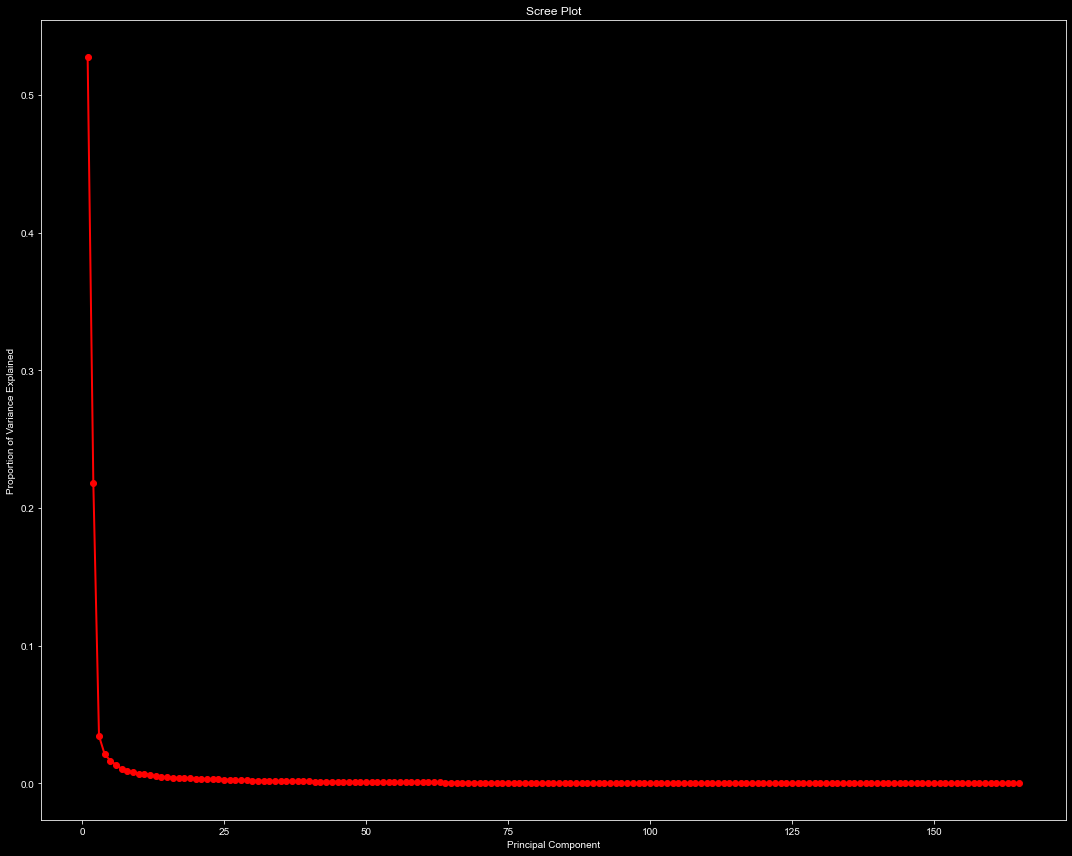

In [83]:
# Calculate the proportion of variance explained by each principal component
variance_explained = (s ** 2) / np.sum(s ** 2)

# Plot the variance explained
plt.plot(np.arange(1, len(variance_explained)+1), variance_explained, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

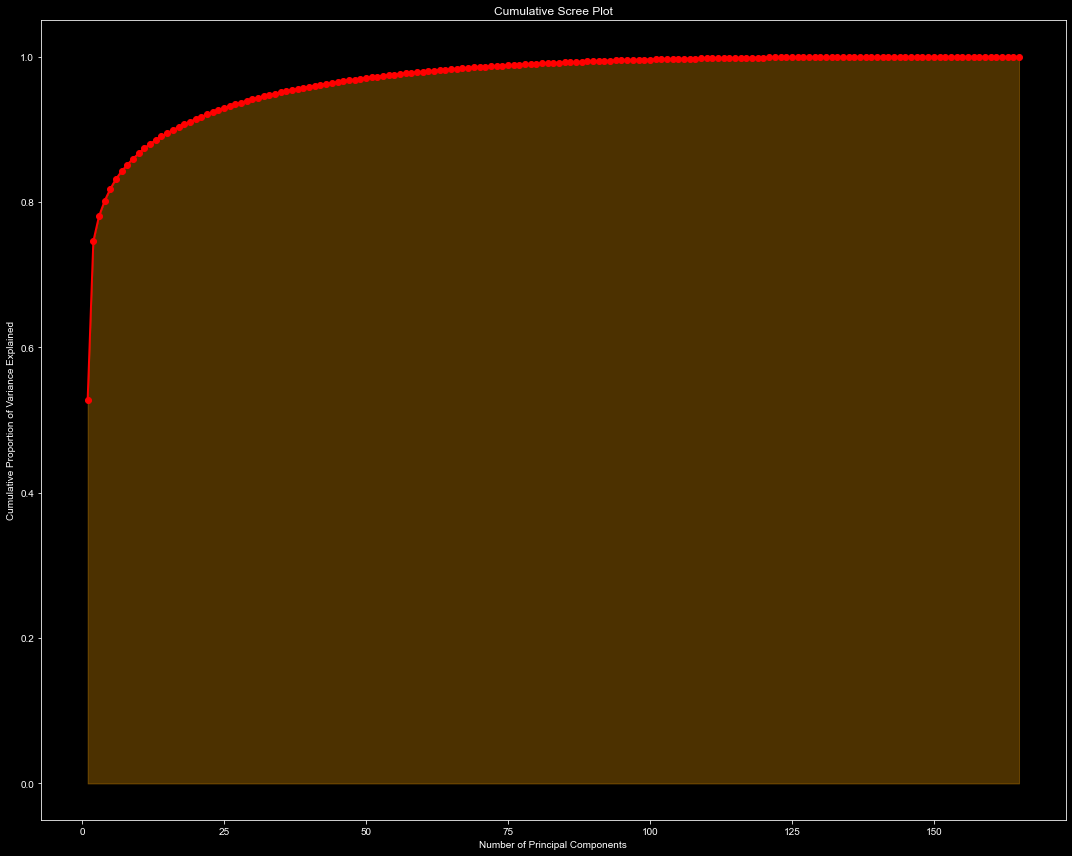

In [84]:
# Calculate the cumulative proportion of variance explained
cumulative_variance_explained = np.cumsum(variance_explained)
# Plot the cumulative scree plot
plt.plot(np.arange(1, len(cumulative_variance_explained)+1), cumulative_variance_explained, 'ro-', linewidth=2)
plt.fill_between(np.arange(1, len(cumulative_variance_explained)+1), cumulative_variance_explained, color='orange', alpha=0.3)
plt.title('Cumulative Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.show()

In [85]:
# Extract the principal components
num_components = 2  # Choose the number of principal components to extract
principal_components = u[:, :num_components]

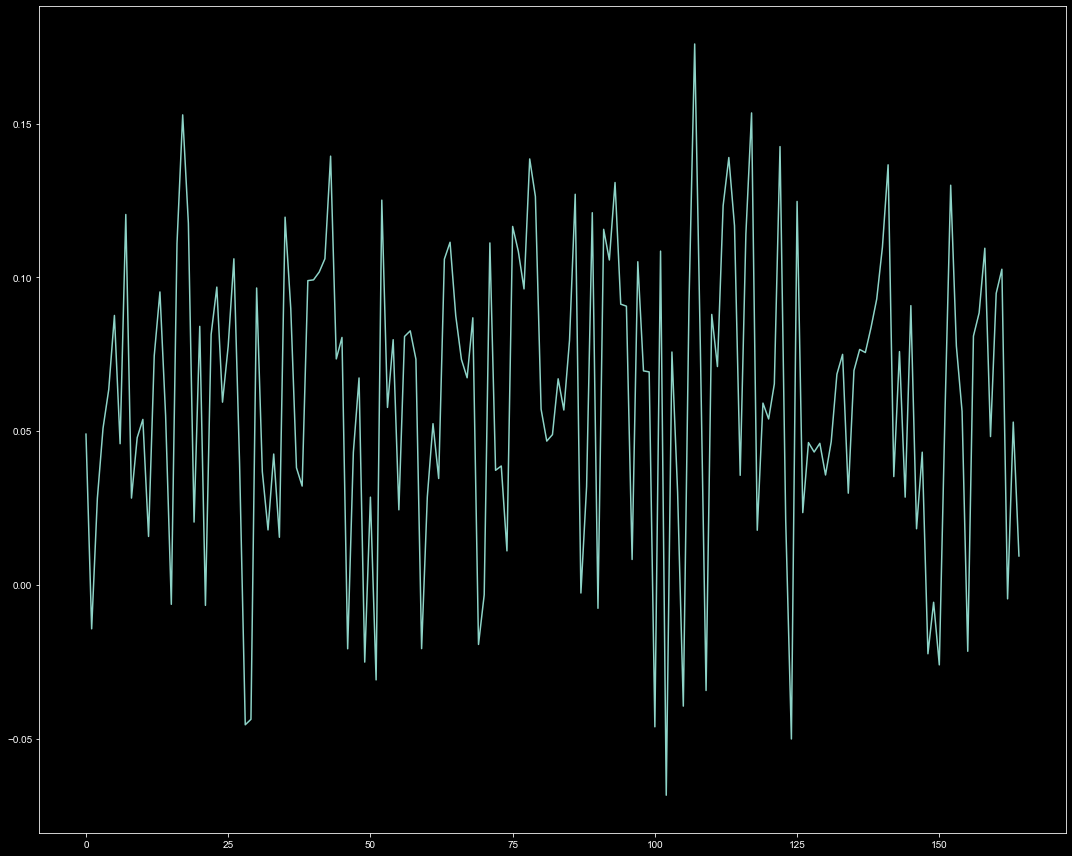

In [86]:
plt.plot(principal_components[:, 0])

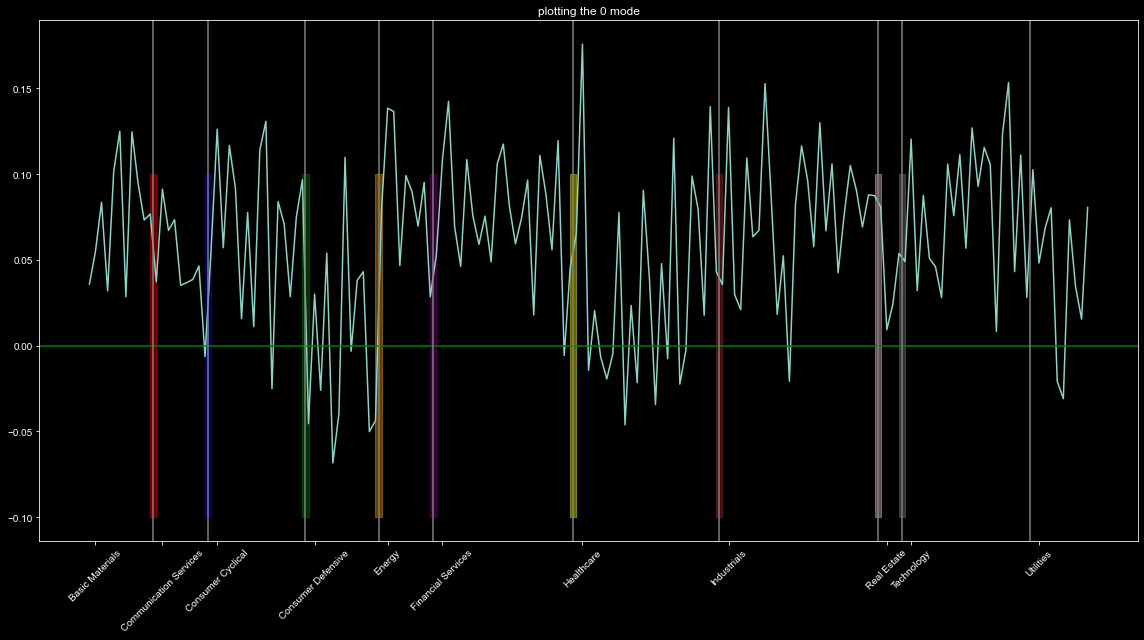

In [87]:
## Remind: now the modes are in a increasing order. -> The first mode is 0 and no more -1
plot_by_sector(mode=0, tk_ind = tkrs_industry, eVec = u)

In [88]:
# Extract the weights of each company in the right singular vectors
company_weights = v.T

# Find the companies with the largest weights in each principal component
leading_companies = {}
for i in range(company_weights.shape[1]):
    component_weights = company_weights[:, i]
    sorted_weights_idx = np.argsort(np.abs(component_weights))[::-1]
    leading_companies[i+1] = lagged_corr.columns[sorted_weights_idx[:10]].tolist()

# Print the leading companies for each principal component
for i in range(len(leading_companies)):
    print(f"Principal Component {i+1}: {leading_companies[i+1]}")

Principal Component 1: ['DUK', 'PNW', 'GD', 'DTE', 'ED', 'ES', 'FE', 'NI', 'CL', 'NOC']
Principal Component 2: ['BK', 'IP', 'NTRS', 'MS', 'PRU', 'IPG', 'MO', 'NUE', 'CMI', 'DIS']
Principal Component 3: ['MOS', 'COP', 'KR', 'HAL', 'PEP', 'OKE', 'EOG', 'KO', 'CVX', 'NOV']
Principal Component 4: ['OKE', 'FLR', 'DVA', 'PGR', 'EMR', 'FMC', 'MCD', 'BA', 'K', 'DTE']
Principal Component 5: ['C', 'PNC', 'BAC', 'JPM', 'PPL', 'HIG', 'KEY', 'OXY', 'HAL', 'HES']
Principal Component 6: ['BA', 'MCHP', 'HIG', 'AMAT', 'GIS', 'LRCX', 'CI', 'MRK', 'ED', 'PRU']
Principal Component 7: ['LUV', 'PHM', 'EA', 'KEY', 'CMA', 'ATVI', 'MDT', 'ADP', 'JPM', 'LOW']
Principal Component 8: ['CI', 'EQR', 'HUM', 'MSFT', 'MS', 'BDX', 'MCK', 'CME', 'PSA', 'BAX']
Principal Component 9: ['PLD', 'AIG', 'NKE', 'EXPD', 'NVDA', 'MU', 'LH', 'ATVI', 'GPC', 'MAS']
Principal Component 10: ['IDXX', 'PHM', 'CSCO', 'EXPD', 'ILMN', 'PCAR', 'FDX', 'FISV', 'GLW', 'BMY']
Principal Component 11: ['HIG', 'MCK', 'PKG', 'NOC', 'BDX', 'LMT', 'H

The SVD can be used to study the maximal lead-lag relationship between different assets. To do this, we can look at the largest singular value, $s_{max(τ)}$, and how it behaves with lag $τ$. The largest singular value represents the strongest correlation between the assets, and the value of τ at which it occurs gives us an idea of the time lag between them.

In [89]:
taus = [1,2,3,4,5,6,7,8,9,10]
s_max = []
for t in taus: 
    df=lagged_correlation(returns, tau = t)
    df=df.replace([np.nan, np.inf, -np.inf], 0)
    u, s, v = np.linalg.svd(df.values) 
    s_max.append(s[0])

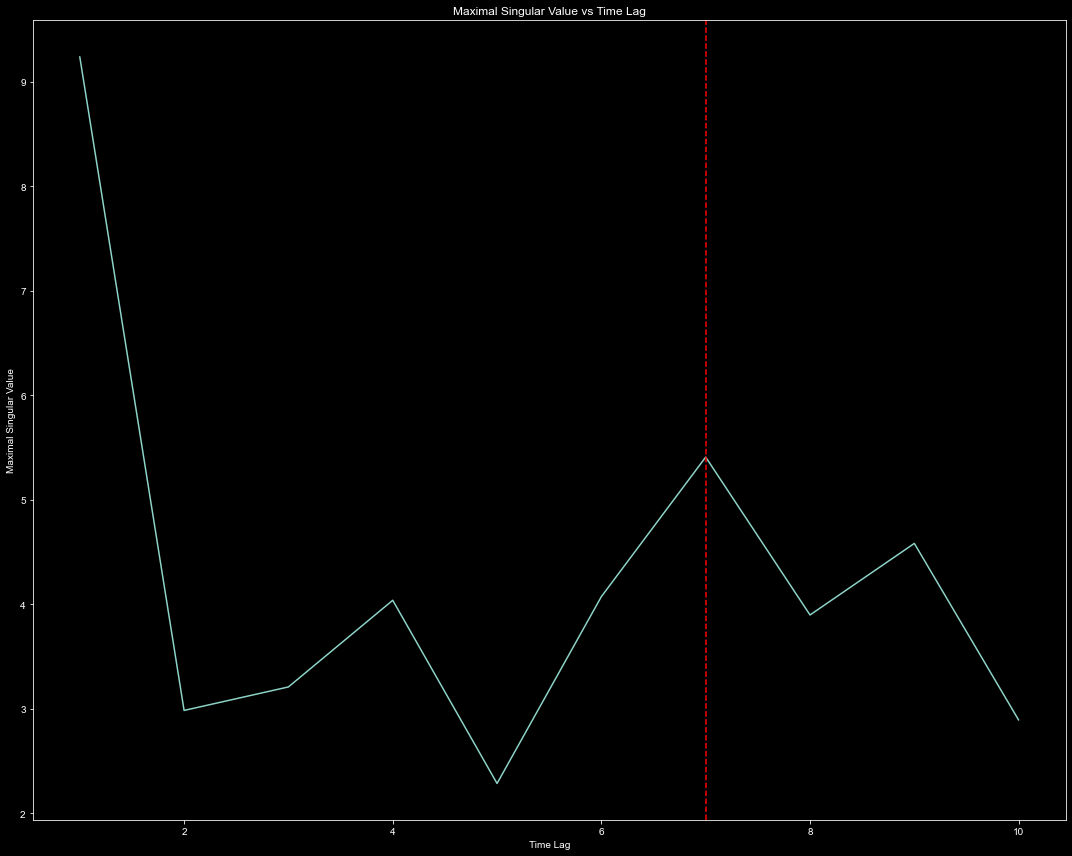

In [90]:
plt.plot(taus, s_max)
plt.axvline(x=7, color='red', linestyle='--')
plt.xlabel('Time Lag')
plt.ylabel('Maximal Singular Value')
plt.title('Maximal Singular Value vs Time Lag')

plt.show()

We want to create a better measure of what are the significant time lag for the market.
we want to sum the meaningful eigevalues, outside the Marcenko Pastur bulk for different time lag

In [117]:
df=lagged_correlation(returns, tau = 1)
df=df.replace([np.nan, np.inf, -np.inf], 0)
u, s, v = np.linalg.svd(df.values) 

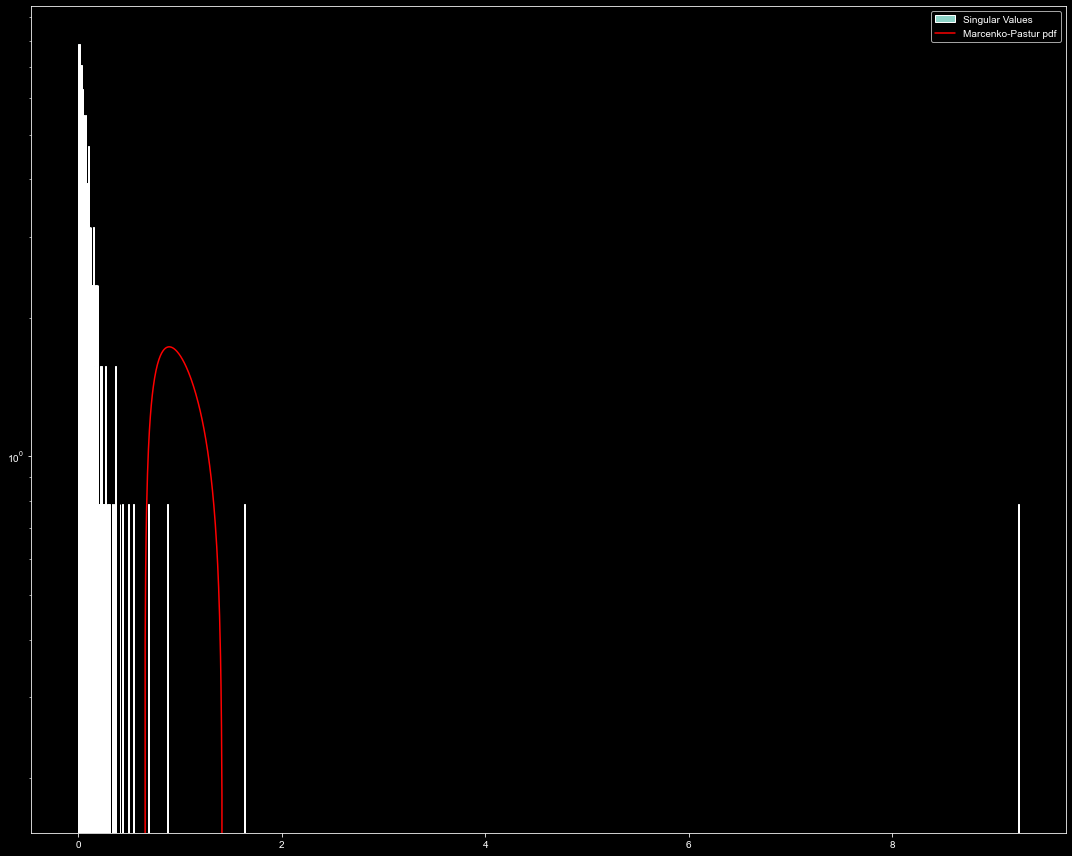

In [118]:
N = len(df)
T = len(returns_d)

#get eigendecomposition
Q = T/N
pdf0 = mpPDF(1., Q, pts=N)


# Marcenko-Pastur, and histogram
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.hist(s, density = True, bins=1200, label="Singular Values") # Histogram the eigenvalues
plt.plot(pdf0.keys(), pdf0, color='r', label="Marcenko-Pastur pdf")

plt.yscale('log') ## lOG SCALE
#plt.xscale('log')
plt.legend(loc="upper right")
plt.show()

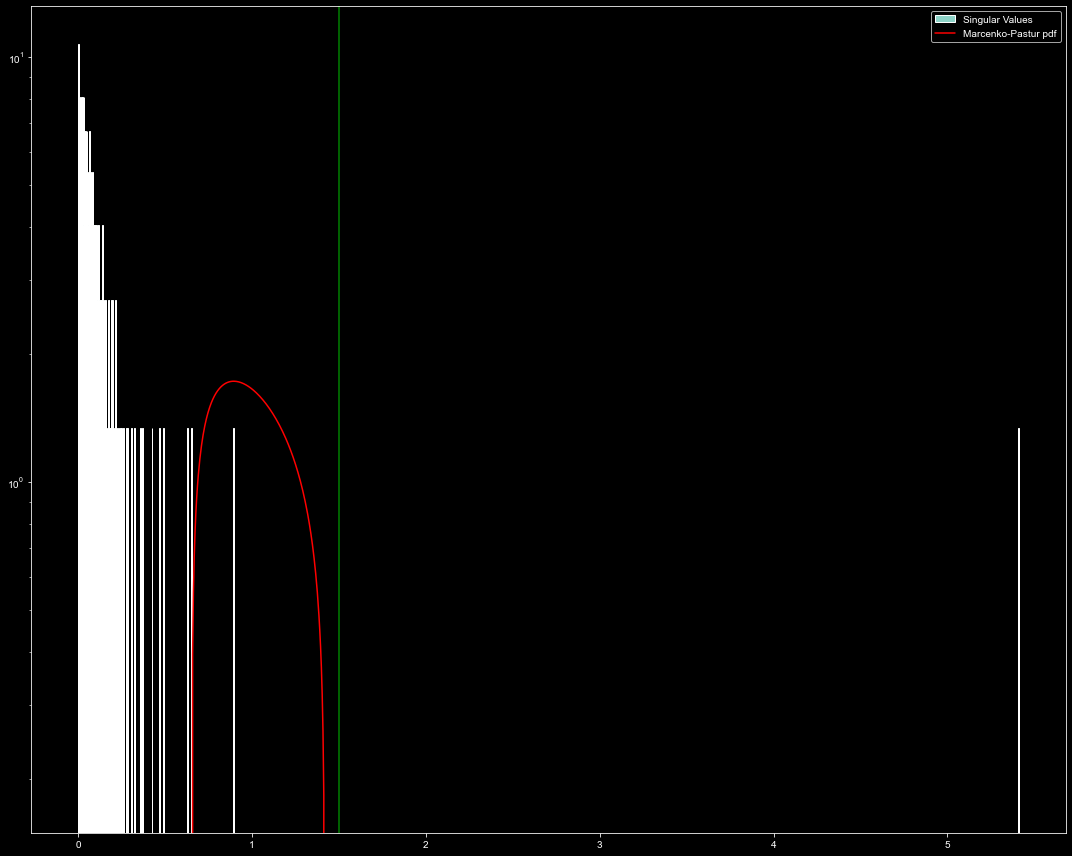

In [122]:
df=lagged_correlation(returns, tau = 7)
df=df.replace([np.nan, np.inf, -np.inf], 0)
u, s, v = np.linalg.svd(df.values) 

# Marcenko-Pastur, and histogram
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.hist(s, density = True, bins=1200, label="Singular Values") # Histogram the eigenvalues
plt.plot(pdf0.keys(), pdf0, color='r', label="Marcenko-Pastur pdf")
# Add a vertical green line at x=1.5
plt.axvline(x=1.5, color='g')

plt.yscale('log') ## lOG SCALE
#plt.xscale('log')
plt.legend(loc="upper right")
plt.show()

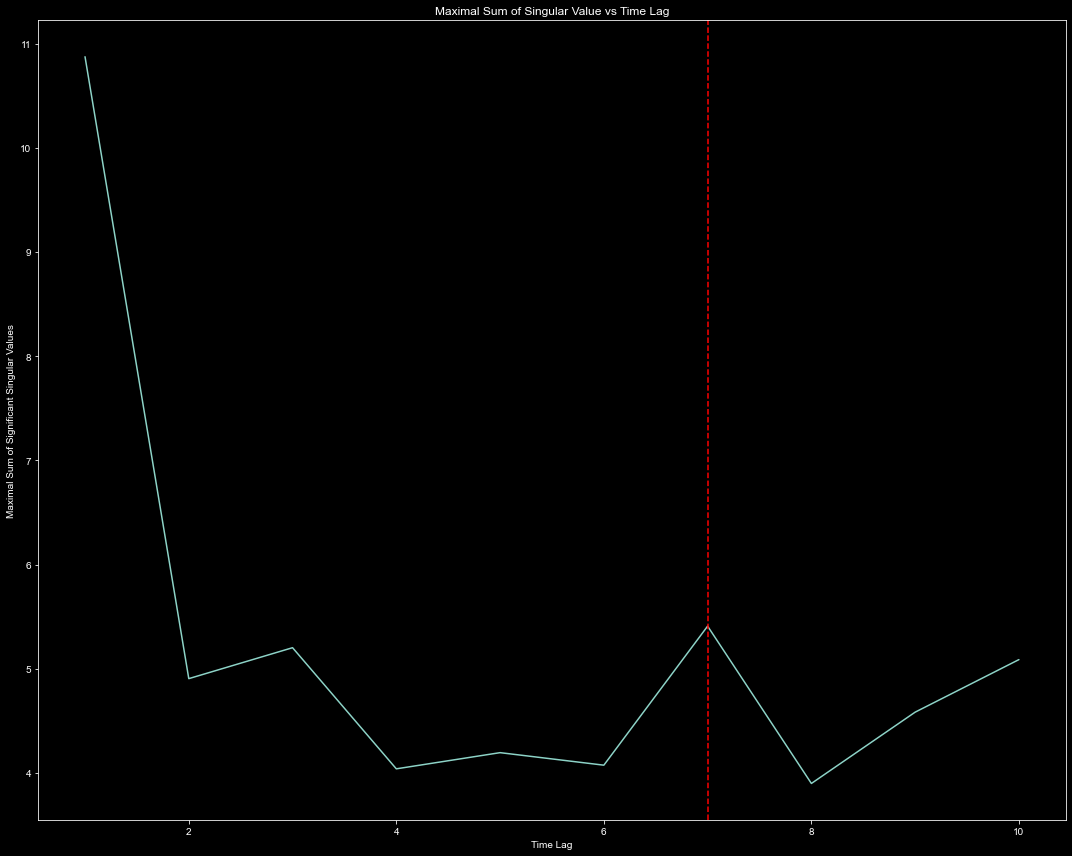

In [123]:
taus = [1,2,3,4,5,6,7,8,9,10]
s_sum = []

for t in taus: 
    df=lagged_correlation(returns, tau = t)
    df=df.replace([np.nan, np.inf, -np.inf], 0)
    u, s, v = np.linalg.svd(df.values) 
    sv_over_treshold = sum(x for x in s if x > 1.5)
    s_sum.append(sv_over_treshold)

    
plt.plot(taus, s_sum)
plt.axvline(x=7, color='red', linestyle='--')
plt.xlabel('Time Lag')
plt.ylabel('Maximal Sum of Significant Singular Values')
plt.title('Maximal Sum of Singular Value vs Time Lag')
plt.show()

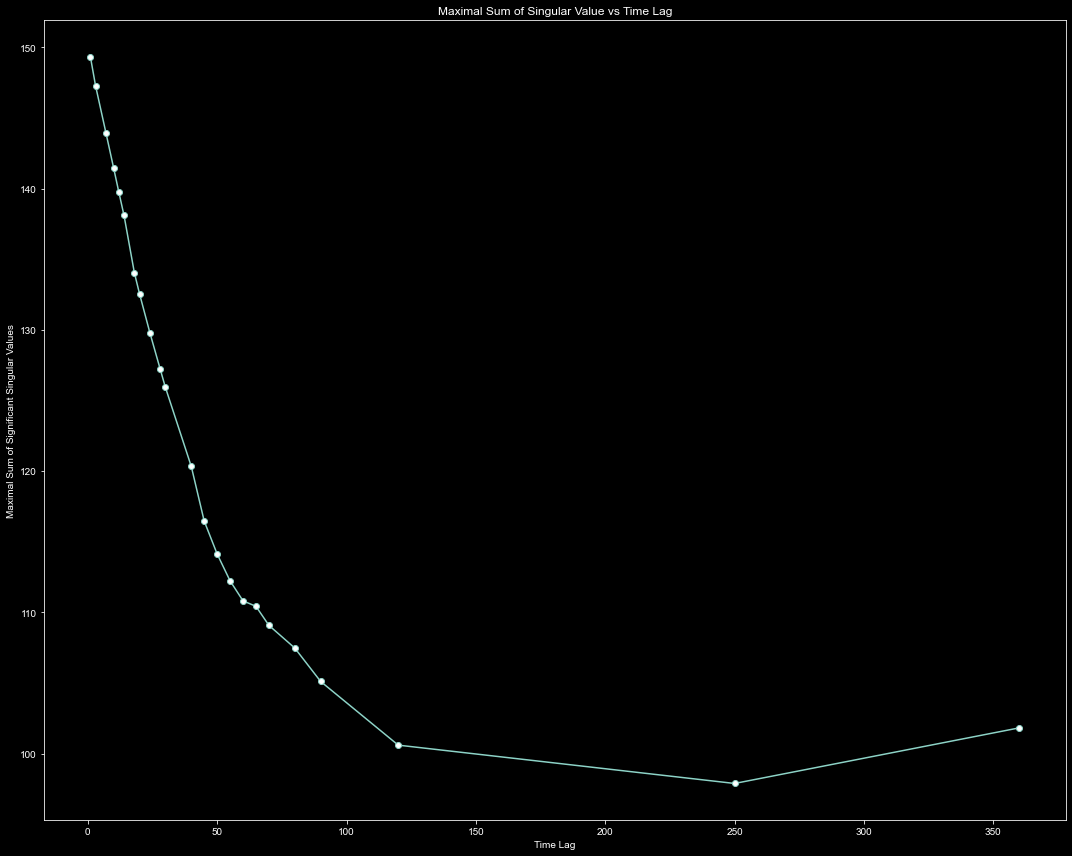

In [334]:
#low frequency
taus = [1,3,7,10,12,14,18,20,24,28,30,40,45,50,55,60,65,70,80,90,120,250,360]
s_sum = []

for t in taus: 
    df=lagged_correlation(returns, tau = t)
    df=df.replace([np.nan, np.inf, -np.inf], 0)
    u, s, v = np.linalg.svd(df.values) 
    sv_over_treshold = sum(x for x in s if x > 1.0)
    s_sum.append(sv_over_treshold)

    
plt.plot(taus, s_sum, marker="o", mfc="white")
#plt.axvline(x=7, color='red', linestyle='--')
#plt.axvline(x=20, color='red', linestyle='--')
plt.xlabel('Time Lag')
plt.ylabel('Maximal Sum of Significant Singular Values')
plt.title('Maximal Sum of Singular Value vs Time Lag')
plt.show()

We can also try to understand how the eigenvectors rotate. Taking for example |u_{λmax}⟩, we expect that ⟨u_{λmax} |u{smax},τ ⟩ ≈ 1 for τ → 0, and also that ⟨u{smax},τ |v{smax},τ ⟩ ≈ 1 for small τ. 
where  |u_{λmax}⟩ refers to the eigenvector of the simple correlation matrix associated with the largest eigenvalue

In [174]:
corr_d
np.diag(eVal_d)[-1]

72.41007177339647

In [175]:
l_corr=lagged_correlation(returns, tau = 1)
l_corr=l_corr.replace([np.nan, np.inf, -np.inf], 0)
u, s, v = np.linalg.svd(l_corr.values) 

In [180]:
len(eVec_d[-1]) == len(u[0])


array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [183]:
dot_prod = np.abs(np.dot(eVec_d[-1], u[0]))
print("Dot product:", dot_prod) ### IT'S NOT WORKING

Dot product: 0.08081324448183765


## Synthetic Data

In [404]:
# Number of vectors to generate
N = 165

# Dimensionality of each vector
time = 1000

# Generate random Gaussian vectors and transpose the matrix
matrix = np.random.randn(time, N)
matrix = pd.DataFrame(matrix)
corr_sy = matrix.corr()
corr_sy

,0,1,2,3,4,5,6,7,8,9,...,155,156,157,158,159,160,161,162,163,164
0,1.000000,-0.038417,-0.008052,-0.032886,0.018379,-0.075183,0.027302,-0.034524,0.031819,-0.015536,...,-0.002205,-0.017385,0.006559,0.008313,-0.018011,0.007901,-0.017522,-0.067603,0.006595,-0.003147
1,-0.038417,1.000000,0.033841,-0.025060,-0.003058,0.002416,-0.042452,0.011546,0.066864,0.020136,...,-0.025014,-0.003659,0.035126,0.046974,0.030484,0.048746,-0.022919,0.020903,-0.027867,-0.036006
2,-0.008052,0.033841,1.000000,-0.055209,-0.052707,0.052035,-0.059909,-0.008191,-0.037158,0.000587,...,0.043733,-0.006070,-0.005157,0.005610,-0.046647,0.039997,0.009314,0.005641,0.075328,0.010907
3,-0.032886,-0.025060,-0.055209,1.000000,-0.038748,-0.008736,0.019479,0.006006,-0.028137,-0.028384,...,-0.005073,0.063980,0.007677,-0.007828,-0.044381,-0.058131,-0.038874,-0.003741,-0.029800,-0.032158
4,0.018379,-0.003058,-0.052707,-0.038748,1.000000,-0.013905,0.022128,-0.022360,0.070060,0.066905,...,-0.019402,-0.028304,0.012718,-0.014360,0.016612,0.028959,-0.024138,-0.010770,0.001147,0.006675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,0.007901,0.048746,0.039997,-0.058131,0.028959,-0.033317,-0.043535,-0.008261,0.036831,-0.005123,...,0.022354,-0.056493,-0.000261,0.025442,-0.033004,1.000000,-0.009681,0.014891,0.030142,0.063358
161,-0.017522,-0.022919,0.009314,-0.038874,-0.024138,0.012555,-0.039876,-0.008745,-0.024564,-0.029120,...,-0.004025,-0.005635,-0.066610,-0.031463,-0.028050,-0.009681,1.000000,0.027810,-0.033547,0.006916
162,-0.067603,0.020903,0.005641,-0.003741,-0.010770,0.030453,0.050308,-0.000166,0.015240,-0.002820,...,-0.000400,-0.023960,0.027036,-0.032068,0.036285,0.014891,0.027810,1.000000,0.014993,0.025769
163,0.006595,-0.027867,0.075328,-0.029800,0.001147,0.004745,0.008504,0.003065,0.004260,-0.031128,...,0.006165,-0.049738,0.008827,-0.018185,-0.003097,0.030142,-0.033547,0.014993,1.000000,0.036794


The Cholesky decomposition can be used to generate correlated random samples from a standard multivariate Gaussian distribution. Here's a step-by-step explanation:

1. Start with a covariance matrix: A covariance matrix represents the variances and covariances of variables. It is a symmetric positive definite matrix.

2. Perform the Cholesky decomposition: Apply the Cholesky decomposition on the covariance matrix to obtain the lower triangular matrix. The lower triangular matrix represents the square roots of the variances and covariances.

3. Generate independent standard Gaussian random samples: Generate a set of independent random samples from a standard Gaussian distribution. These samples have zero mean and unit variance.

4. Transform the samples using the Cholesky decomposition: Multiply the independent standard Gaussian samples by the transpose of the lower triangular matrix obtained from the Cholesky decomposition. This transformation applies the correlations and scales the samples to have the desired variances and covariances.

By performing this transformation, you obtain correlated random samples with the desired covariance structure. Each row in the resulting matrix represents a sample with the specified correlations.



In [405]:
# Cholesky decomposition
lower_triangle = np.linalg.cholesky(corr_sy)

# Number of samples to generate
num_samples = 3274

# Dimensionality of each sample
dimension = corr_sy.shape[0]

# Generate random Gaussian samples with the desired correlation
samples = np.random.randn(num_samples, dimension) @ lower_triangle

# Display the samples
samples = pd.DataFrame(samples)
samples

,0,1,2,3,4,5,6,7,8,9,...,155,156,157,158,159,160,161,162,163,164
0,0.292350,0.958920,-1.255950,-1.986393,1.868486,1.171111,0.860443,-1.623051,-1.313248,0.178380,...,0.169910,-0.099617,-0.583251,-0.662336,0.654937,-1.535952,-0.701322,-0.758813,0.063720,-0.782002
1,0.804514,-0.095780,-0.337436,-0.408228,1.245250,-0.242494,1.138665,0.184978,1.808939,-1.145111,...,-0.382788,-0.071386,-0.517963,-0.070196,-0.116539,0.463078,1.112209,0.186809,-0.300937,0.471227
2,-0.123594,0.860970,-0.665587,1.989626,-1.487149,2.099249,0.436794,-0.546673,-0.204986,2.207972,...,1.791401,-0.151369,0.497977,1.431297,0.487203,-0.238435,0.561792,-2.391286,-0.022204,1.007112
3,-0.349444,0.686605,-0.286386,-0.636571,1.622925,0.164839,-1.034752,0.058587,-0.215525,0.446543,...,-0.599067,-0.675950,1.597601,-1.044245,0.546426,-0.085077,-1.363609,0.351333,-0.668868,0.339090
4,0.994613,0.942623,1.528070,-1.501828,-0.193952,-0.227718,0.470837,-0.683413,-0.051574,0.749565,...,0.685996,0.200769,0.978831,0.922363,-0.181938,-0.268533,0.058093,-1.051318,1.205628,-0.256516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3269,0.565223,0.043621,1.111348,-0.020065,-1.910953,-0.521983,1.337116,0.300826,0.381586,2.191121,...,-1.205526,0.694684,-0.294532,0.384909,-0.000252,0.279944,-1.398956,-0.004399,1.472846,-0.681386
3270,0.123770,-0.697631,-0.021990,0.715851,-0.159146,-1.229578,0.021248,0.786674,1.176724,0.394483,...,2.042919,0.359475,1.613316,0.857239,0.340521,-0.139629,0.746241,0.899565,-0.482551,-0.980059
3271,0.110609,1.446946,1.377822,-0.550198,1.406292,0.516719,0.245022,-0.371533,0.107604,0.748329,...,0.209738,-0.636635,-0.859470,0.979697,-0.187313,0.044047,-0.588577,-0.500563,0.006273,-1.004747
3272,-0.887747,-0.890878,0.144526,2.449419,1.160320,0.234079,-2.896249,-2.480265,0.611379,1.642276,...,-1.557956,1.963535,-0.379269,0.894807,-0.123066,0.074478,-0.941521,0.346460,-0.310831,-1.053543


- Checking the decreasing law for maximum singular values using Synthetic data

In [402]:
print(len(returns.values[:,1]), len(returns.values[1]))
print(len(samples.values[:,1]), len(samples.values[1]))


3274 165
250 100


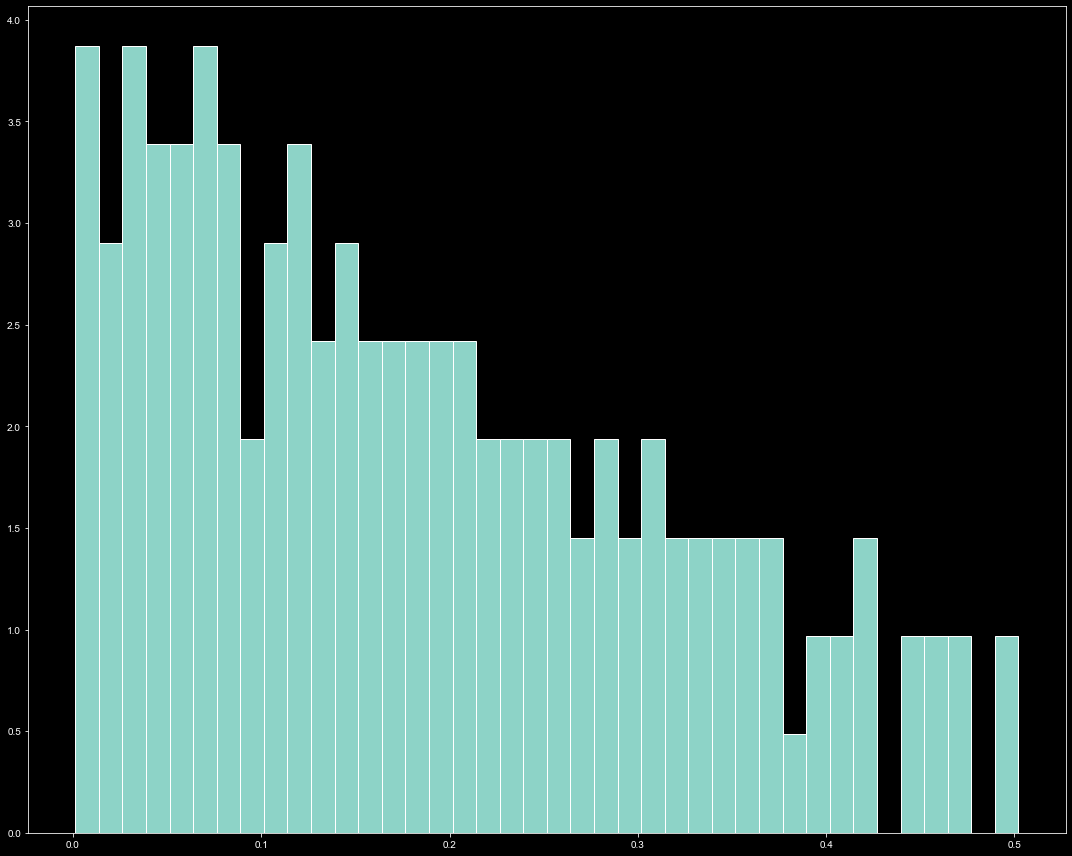

In [446]:
df_s=lagged_correlation(samples, tau = 18)
df_s=df_s.replace([np.nan, np.inf, -np.inf], 0)
u, s, v = np.linalg.svd(df_s.values) 

fig = plt.figure()
ax  = fig.add_subplot(111)
ax.hist(s, density = True, bins=40, label="Singular Values") # Histogram the eigenvalues
plt.show()

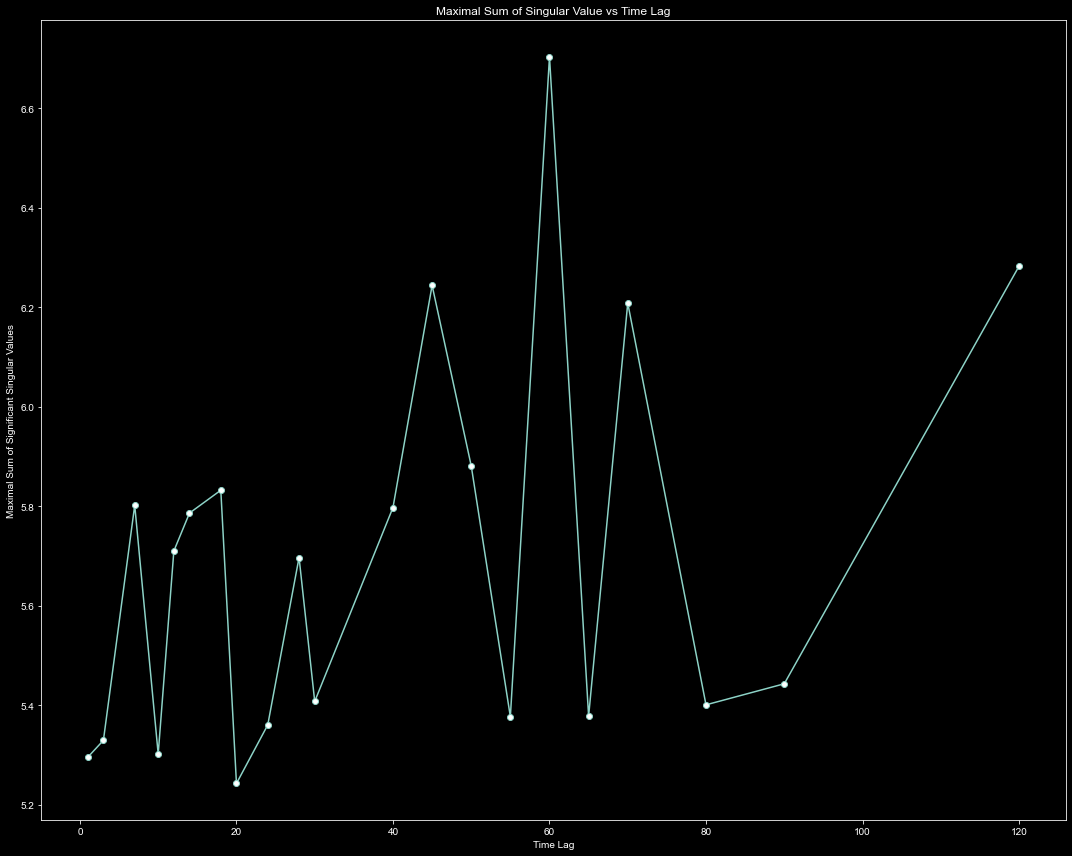

In [447]:
#low frequency
taus = [1,3,7,10,12,14,18,20,24,28,30,40,45,50,55,60,65,70,80,90,120]
s_sum = []

for t in taus: 
    df_s=lagged_correlation(samples, tau = t)
    df_s=df_s.replace([np.nan, np.inf, -np.inf], 0)
    u, s, v = np.linalg.svd(df_s.values) 
    sv_over_treshold = sum(x for x in s if x > 0.4)
    s_sum.append(sv_over_treshold)

    
plt.plot(taus, s_sum, marker="o", mfc="white")
plt.xlabel('Time Lag')
plt.ylabel('Maximal Sum of Significant Singular Values')
plt.title('Maximal Sum of Singular Value vs Time Lag')
plt.show()

## Exotic Methods

https://arxiv.org/pdf/physics/0512090.pdf  - Bouchaud Paper , suggested by Jose

papers on lead-lag effects:

https://link.springer.com/article/10.1140/epjb/e2014-50108-3

https://jfin-swufe.springeropen.com/articles/10.1186/s40854-022-00356-3 

https://www.sciencedirect.com/science/article/abs/pii/S0378437107001781 - sornette

https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2648490  - mantegna


### EOF Atmospheric Science

applying the results and techniques described in [Empirical orthogonal functions and related techniques in atmospheric science: A review  . A. Hannachi,* I. T. Jolliffe and D. B. Stephenson] to my case. 